# 6.7 Data Work

<a id='0'></a> <br>
 # Table of Contents  

1. [Import Data and Libraries](#1)
1. [Merge Player Positions Data](#2)
1. [Merge University Data](#3)
1. [Manipulation for Final DF](#4)
1. [Create Conference % Column](#5)
1. [Create Correlation heatmap with new column](#6)
    1. [Off heatmap](#7)
    1. [Def heatmap](#8)
    1. [SPT heatmap](#9)

<a id='1'></a> <br>
## 1. Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
path = r'G:\My Drive\CareerFoundry\Python Projects\2024-3 Data Immersion Task 6.7'

In [3]:
# set # of rows and columns to show

pd.set_option('display.max_columns', 210)
pd.set_option('display.max_rows', 210)

In [4]:
# import latest df_sbs

df_sbs_v10 = pd.read_pickle(os.path.join(path, '02 Data', 'Original Data', 'df_sbs_v10.pkl'))

In [5]:
# check df

df_sbs_v10.shape

(6538, 196)

In [6]:
df_sbs_v10.head()

Player_Stats (Tm)  Player_Stats (SB) Player_Stats (Key)  \
0               ARI                 43              ARI43   
1               ARI                 43              ARI43   
2               ARI                 43              ARI43   
3               ARI                 43              ARI43   
4               ARI                 43              ARI43   

  Player_Stats (Player)  Player_Stats (No.)  Player_Stats (Age)  \
0       Aaron Francisco                  47                  25   
1         Adrian Wilson                  24                  29   
2           Alan Branch                  78                  24   
3           Gabe Watson                  98                  25   
4          Jerame Tuman                  84                  32   

  Player_Stats (Pos)  O/D/SPT Player_Stats (College/Univ)  \
0                 DB  Defense                         BYU   
1                 SS  Defense          North Carolina St.   
2                 DT  Defense                    Michigan   
3                 DT  Defense                    Michigan   
4                 TE  Offense                    Michigan   

  Player_Stats (Univ_State) Player_Stats (BirthDate)  \
0                        UT                 7/5/1983   
1                        NC               10/12/1979   
2                        MI               12/29/1984   
3                        MI                9/24/1983   
4                        MI                3/24/1976   

   Player_Stats (Yrs_Active) Player_Stats (Super_bowl) Player_Stats (Team)  \
0                          3                     XLIII   Arizona Cardinals   
1                          7                     XLIII   Arizona Cardinals   
2                          1                     XLIII   Arizona Cardinals   
3                          2                     XLIII   Arizona Cardinals   
4                          9                     XLIII   Arizona Cardinals   

   Player_Stats (Pts) Player_Stats (MVP) Player_Stats (Stadium)  \
0                  23    Santonio Holmes  Raymond James Stadium   
1                  23    Santonio Holmes  Raymond James Stadium   
2                  23    Santonio Holmes  Raymond James Stadium   
3                  23    Santonio Holmes  Raymond James Stadium   
4                  23    Santonio Holmes  Raymond James Stadium   

  Player_Stats (City) Player_Stats (State) Player_Stats (Date)  \
0               Tampa              Florida            2/1/2009   
1               Tampa              Florida            2/1/2009   
2               Tampa              Florida            2/1/2009   
3               Tampa              Florida            2/1/2009   
4               Tampa              Florida            2/1/2009   

   Player_Stats (W/L)  O_Passing (Cmp)  O_Passing (Att)  O_Passing (Yds)  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                   0                0                0                0   
4                   0                0                0                0   

   O_Passing (TD)  O_Passing (Int)  O_Passing (Sk)  O_Passing (-Yds)  \
0               0                0               0                 0   
1               0                0               0                 0   
2               0                0               0                 0   
3               0                0               0                 0   
4               0                0               0                 0   

   O_Passing (Lng)  O_Passing (Rate)  O_Rushing (Att)  O_Rushing (Yds)  \
0                0               0.0                0                0   
1                0               0.0                0                0   
2                0               0.0                0                0   
3                0               0.0                0                0   

In [10]:
# import university data

df_univ = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'univ_divisions.csv'))

In [11]:
# check df

df_univ.shape

(384, 7)

In [12]:
df_univ.head()

Player_Stats (College/Univ)                                    School  \
0              Long Beach St.  California State University - Long Beach   
1                   Marquette                      Marquette University   
2                UC Riverside       University of California, Riverside   
3                   Air Force           United States Air Force Academy   
4                       Akron                       University of Akron   

           City and State     Type  \
0  Long Beach, California   Public   
1    Milwaukee, Wisconsin  Private   
2   Riverside, California   Public   
3  USAF Academy, Colorado   Public   
4             Akron, Ohio   Public   

                                   Conference Division Sub-division  
0          Pacific Coast Athletic Association  NCAA D1      NCAA D1  
1                     Division I Independents  NCAA D1      NCAA D1  
2  California Collegiate Athletic Association  NCAA D1      NCAA D1  
3                    Mountain West Conference  NCAA D1          FBS  
4                     Mid-American Conference  NCAA D1          FBS

In [13]:
# import positions data

df_positions = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'player_positions.csv'))

In [14]:
# check df

df_positions.shape

(73, 2)

In [15]:
df_positions.head()

Player_Stats (Pos)                          Position
0                  C                        Center (C)
1                 CB                    Conerback (CB)
2                 DB               Defensive Back (DB)
3                 DE                Defensive End (DE)
4              DE/LB  Defensive End/Linebacker (DE/LB)

<a id='2'></a> <br>
## 2. Merge Player Positions Data

In [16]:
# merge positions df with v10

df_merge = df_sbs_v10.merge(df_positions, on=['Player_Stats (Pos)'], how='left')

In [17]:
# check merge

df_merge.head()

Player_Stats (Tm)  Player_Stats (SB) Player_Stats (Key)  \
0               ARI                 43              ARI43   
1               ARI                 43              ARI43   
2               ARI                 43              ARI43   
3               ARI                 43              ARI43   
4               ARI                 43              ARI43   

  Player_Stats (Player)  Player_Stats (No.)  Player_Stats (Age)  \
0       Aaron Francisco                  47                  25   
1         Adrian Wilson                  24                  29   
2           Alan Branch                  78                  24   
3           Gabe Watson                  98                  25   
4          Jerame Tuman                  84                  32   

  Player_Stats (Pos)  O/D/SPT Player_Stats (College/Univ)  \
0                 DB  Defense                         BYU   
1                 SS  Defense          North Carolina St.   
2                 DT  Defense                    Michigan   
3                 DT  Defense                    Michigan   
4                 TE  Offense                    Michigan   

  Player_Stats (Univ_State) Player_Stats (BirthDate)  \
0                        UT                 7/5/1983   
1                        NC               10/12/1979   
2                        MI               12/29/1984   
3                        MI                9/24/1983   
4                        MI                3/24/1976   

   Player_Stats (Yrs_Active) Player_Stats (Super_bowl) Player_Stats (Team)  \
0                          3                     XLIII   Arizona Cardinals   
1                          7                     XLIII   Arizona Cardinals   
2                          1                     XLIII   Arizona Cardinals   
3                          2                     XLIII   Arizona Cardinals   
4                          9                     XLIII   Arizona Cardinals   

   Player_Stats (Pts) Player_Stats (MVP) Player_Stats (Stadium)  \
0                  23    Santonio Holmes  Raymond James Stadium   
1                  23    Santonio Holmes  Raymond James Stadium   
2                  23    Santonio Holmes  Raymond James Stadium   
3                  23    Santonio Holmes  Raymond James Stadium   
4                  23    Santonio Holmes  Raymond James Stadium   

  Player_Stats (City) Player_Stats (State) Player_Stats (Date)  \
0               Tampa              Florida            2/1/2009   
1               Tampa              Florida            2/1/2009   
2               Tampa              Florida            2/1/2009   
3               Tampa              Florida            2/1/2009   
4               Tampa              Florida            2/1/2009   

   Player_Stats (W/L)  O_Passing (Cmp)  O_Passing (Att)  O_Passing (Yds)  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                   0                0                0                0   
4                   0                0                0                0   

   O_Passing (TD)  O_Passing (Int)  O_Passing (Sk)  O_Passing (-Yds)  \
0               0                0               0                 0   
1               0                0               0                 0   
2               0                0               0                 0   
3               0                0               0                 0   
4               0                0               0                 0   

   O_Passing (Lng)  O_Passing (Rate)  O_Rushing (Att)  O_Rushing (Yds)  \
0                0               0.0                0                0   
1                0               0.0                0                0   
2                0               0.0                0                0   
3                0               0.0                0                0   

In [18]:
df_merge.shape

(6538, 197)

<a id='3'></a> <br>
## 3. Merge University Data

In [19]:
# merge univ_div df with merge df

df_merge_2 = df_merge.merge(df_univ, on=['Player_Stats (College/Univ)'], how='left')

In [20]:
# check merge

df_merge_2.shape

(6538, 203)

In [23]:
df_merge_2.head()

Player_Stats (Tm)  Player_Stats (SB) Player_Stats (Key)  \
0               ARI                 43              ARI43   
1               ARI                 43              ARI43   
2               ARI                 43              ARI43   
3               ARI                 43              ARI43   
4               ARI                 43              ARI43   

  Player_Stats (Player)  Player_Stats (No.)  Player_Stats (Age)  \
0       Aaron Francisco                  47                  25   
1         Adrian Wilson                  24                  29   
2           Alan Branch                  78                  24   
3           Gabe Watson                  98                  25   
4          Jerame Tuman                  84                  32   

  Player_Stats (Pos)  O/D/SPT Player_Stats (College/Univ)  \
0                 DB  Defense                         BYU   
1                 SS  Defense          North Carolina St.   
2                 DT  Defense                    Michigan   
3                 DT  Defense                    Michigan   
4                 TE  Offense                    Michigan   

  Player_Stats (Univ_State) Player_Stats (BirthDate)  \
0                        UT                 7/5/1983   
1                        NC               10/12/1979   
2                        MI               12/29/1984   
3                        MI                9/24/1983   
4                        MI                3/24/1976   

   Player_Stats (Yrs_Active) Player_Stats (Super_bowl) Player_Stats (Team)  \
0                          3                     XLIII   Arizona Cardinals   
1                          7                     XLIII   Arizona Cardinals   
2                          1                     XLIII   Arizona Cardinals   
3                          2                     XLIII   Arizona Cardinals   
4                          9                     XLIII   Arizona Cardinals   

   Player_Stats (Pts) Player_Stats (MVP) Player_Stats (Stadium)  \
0                  23    Santonio Holmes  Raymond James Stadium   
1                  23    Santonio Holmes  Raymond James Stadium   
2                  23    Santonio Holmes  Raymond James Stadium   
3                  23    Santonio Holmes  Raymond James Stadium   
4                  23    Santonio Holmes  Raymond James Stadium   

  Player_Stats (City) Player_Stats (State) Player_Stats (Date)  \
0               Tampa              Florida            2/1/2009   
1               Tampa              Florida            2/1/2009   
2               Tampa              Florida            2/1/2009   
3               Tampa              Florida            2/1/2009   
4               Tampa              Florida            2/1/2009   

   Player_Stats (W/L)  O_Passing (Cmp)  O_Passing (Att)  O_Passing (Yds)  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                   0                0                0                0   
4                   0                0                0                0   

   O_Passing (TD)  O_Passing (Int)  O_Passing (Sk)  O_Passing (-Yds)  \
0               0                0               0                 0   
1               0                0               0                 0   
2               0                0               0                 0   
3               0                0               0                 0   
4               0                0               0                 0   

   O_Passing (Lng)  O_Passing (Rate)  O_Rushing (Att)  O_Rushing (Yds)  \
0                0               0.0                0                0   
1                0               0.0                0                0   
2                0               0.0                0                0   
3                0               0.0                0                0   

<a id='4'></a> <br>
## 4. Manipulation for Final DF

In [24]:
# create final df_sbs

df_sbs_merge = df_merge_2[['Player_Stats (Tm)', 'Player_Stats (SB)', 'Player_Stats (Key)', 'Unique_Key', 'Player_Stats (Player)', 'Player_Stats (No.)', 'Player_Stats (Age)', 'Player_Stats (BirthDate)', 'Player_Stats (Yrs_Active)', 'Player_Stats (Pos)', 'O/D/SPT', 'Position', 'School', 'City and State', 'Type', 'Conference', 'Division', 'Sub-division', 'Player_Stats (Super_bowl)', 'Player_Stats (Team)', 'Player_Stats (Pts)', 'Player_Stats (MVP)', 'Player_Stats (Stadium)', 'Player_Stats (City)', 'Player_Stats (State)', 'Player_Stats (Date)', 'Player_Stats (W/L)', 'O_Passing (Cmp)', 'O_Passing (Att)', 'O_Passing (Yds)', 'O_Passing (TD)', 'O_Passing (Int)', 'O_Passing (Sk)', 'O_Passing (-Yds)', 'O_Passing (Lng)', 'O_Passing (Rate)', 'O_Rushing (Att)', 'O_Rushing (Yds)', 'O_Rushing (TD)', 'O_Rushing (Lng)', 'O_Receiving (Rec)', 'O_Receiving (Yds)', 'O_Receiving (TD)', 'O_Receiving (Lng)', 'O_Fumbles (Fmb)', 'O_Fumbles (FL)', 'D_Interceptions (Int)', 'D_Interceptions (Yds)', 'D_Interceptions (TD)', 'D_Interceptions (Lng)', 'D_Sacks (Sk)', 'D_Tackles (Comb)', 'D_Tackles (Solo)', 'D_Tackles (Ast)', 'D_Fumbles (FR)', 'D_Fumbles (Yds)', 'D_Fumbles (TD)', 'D_Fumbles (FF)', 'SPT_Kick_Returns (Rt)', 'SPT_Kick_Returns (Yds)', 'SPT_Kick_Returns (Y/Rt)', 'SPT_Kick_Returns (TD)', 'SPT_Kick_Returns (Lng)', 'SPT_Punt_Returns (Ret)', 'SPT_Punt_Returns (Yds)', 'SPT_Punt_Returns (Y/R)', 'SPT_Punt_Returns (TD)', 'SPT_Punt_Returns (Lng)', 'SPT_Scoring (XPM)', 'SPT_Scoring (XPA)', 'SPT_Scoring (FGM)', 'SPT_Scoring (FGA)', 'SPT_Punting (Pnt)', 'SPT_Punting (Yds)', 'SPT_Punting (Y/P)', 'SPT_Punting (Lng)', 'TEAM_O_Passing (Cmp)', 'TEAM_O_Passing (Att)', 'TEAM_O_Passing (Yds)', 'TEAM_O_Passing (TD)', 'TEAM_O_Passing (Int)', 'TEAM_O_Passing (Sk)', 'TEAM_O_Passing (-Yds)', 'TEAM_O_Passing (Lng)', 'TEAM_O_Passing (Rate)', 'TEAM_O_Rushing (Att)', 'TEAM_O_Rushing (Yds)', 'TEAM_O_Rushing (TD)', 'TEAM_O_Rushing (Lng)', 'TEAM_O_Receiving (Rec)', 'TEAM_O_Receiving (Yds)', 'TEAM_O_Receiving (TD)', 'TEAM_O_Receiving (Lng)', 'TEAM_O_Fumbles (Fmb)', 'TEAM_O_Fumbles (FL)', 'TEAM_D_Interceptions (Int)', 'TEAM_D_Interceptions (Yds)', 'TEAM_D_Interceptions (TD)', 'TEAM_D_Interceptions (Lng)', 'TEAM_D_Sacks (Sk)', 'TEAM_D_Tackles (Comb)', 'TEAM_D_Tackles (Solo)', 'TEAM_D_Tackles (Ast)', 'TEAM_D_Fumbles (FR)', 'TEAM_D_Fumbles (Yds)', 'TEAM_D_Fumbles (TD)', 'TEAM_D_Fumbles (FF)', 'TEAM_SPT_Kick_Returns (Rt)', 'TEAM_SPT_Kick_Returns (Yds)', 'TEAM_SPT_Kick_Returns (Y/Rt)', 'TEAM_SPT_Kick_Returns (TD)', 'TEAM_SPT_Kick_Returns (Lng)', 'TEAM_SPT_Punt_Returns (Ret)', 'TEAM_SPT_Punt_Returns (Yds)', 'TEAM_SPT_Punt_Returns (Y/R)', 'TEAM_SPT_Punt_Returns (TD)', 'TEAM_SPT_Punt_Returns (Lng)', 'TEAM_SPT_Scoring (XPM)', 'TEAM_SPT_Scoring (XPA)', 'TEAM_SPT_Scoring (FGM)', 'TEAM_SPT_Scoring (FGA)', 'TEAM_SPT_Punting (Pnt)', 'TEAM_SPT_Punting (Yds)', 'TEAM_SPT_Punting (Y/P)', 'TEAM_SPT_Punting (Lng)', 'TEAM_total_yds', 'TEAM_total_tds', 'TEAM_total_turnovers', 'Total_Wins_by_Team', 'Total_#_of_players', 'Alum_%', 'Avg_Player_Age_by_Team', 'Avg_Player_Yrs_by_Team', 'Num_of_Univs', 'Total_Pass_Att', 'Total_Rush_Att', 'Total_Atts', 'Pass_%', 'Rush_Att_Category', 'Univ_O_Passing (Cmp)', 'Univ_O_Passing (Att)', 'Univ_O_Passing (Yds)', 'Univ_O_Passing (TD)', 'Univ_O_Passing (Int)', 'Univ_O_Passing (Sk)', 'Univ_O_Passing (-Yds)', 'Univ_O_Passing (Lng)', 'Univ_O_Passing (Rate)', 'Univ_O_Rushing (Att)', 'Univ_O_Rushing (Yds)', 'Univ_O_Rushing (TD)', 'Univ_O_Rushing (Lng)', 'Univ_O_Receiving (Rec)', 'Univ_O_Receiving (Yds)', 'Univ_O_Receiving (TD)', 'Univ_O_Receiving (Lng)', 'Univ_O_Fumbles (Fmb)', 'Univ_O_Fumbles (FL)', 'Univ_D_Interceptions (Int)', 'Univ_D_Interceptions (Yds)', 'Univ_D_Interceptions (TD)', 'Univ_D_Interceptions (Lng)', 'Univ_D_Sacks (Sk)', 'Univ_D_Tackles (Comb)', 'Univ_D_Tackles (Solo)', 'Univ_D_Tackles (Ast)', 'Univ_D_Fumbles (FR)', 'Univ_D_Fumbles (Yds)', 'Univ_D_Fumbles (TD)', 'Univ_D_Fumbles (FF)', 'Univ_SPT_Kick_Returns (Rt)', 'Univ_SPT_Kick_Returns (Yds)', 'Univ_SPT_Kick_Returns (Y/Rt)', 'Univ_SPT_Kick_Returns (TD)', 'Univ_SPT_Kick_Returns (Lng)', 'Univ_SPT_Punt_Returns (Ret)', 'Univ_SPT_Punt_Returns (Yds)', 'Univ_SPT_Punt_Returns (Y/R)', 'Univ_SPT_Punt_Returns (TD)', 'Univ_SPT_Punt_Returns (Lng)', 'Univ_SPT_Scoring (XPM)', 'Univ_SPT_Scoring (XPA)', 'Univ_SPT_Scoring (FGM)', 'Univ_SPT_Scoring (FGA)', 'Univ_SPT_Punting (Pnt)', 'Univ_SPT_Punting (Yds)', 'Univ_SPT_Punting (Y/P)', 'Univ_SPT_Punting (Lng)', 'Univ_Avg_Age_by_Team', 'Univ_Avg_Yrs_by_Team', 'Univ_Alum_per_Team', 'Univ_Alum_per_SB', 'Univ_Total_Rings', 'Univ_Total_Wins', 'Univ_Total_MVPs', 'State_Alum_per_Team', 'State_Alum_per_SB', 'State_Total_Rings', 'State_Total_Wins', 'State_Total_MVPs', 'clusters']]

In [26]:
# check df

df_sbs_merge.shape

(6538, 201)

In [27]:
df_sbs_merge.head()

Player_Stats (Tm)  Player_Stats (SB) Player_Stats (Key)  \
0               ARI                 43              ARI43   
1               ARI                 43              ARI43   
2               ARI                 43              ARI43   
3               ARI                 43              ARI43   
4               ARI                 43              ARI43   

             Unique_Key Player_Stats (Player)  Player_Stats (No.)  \
0  ARI43Aaron Francisco       Aaron Francisco                  47   
1    ARI43Adrian Wilson         Adrian Wilson                  24   
2      ARI43Alan Branch           Alan Branch                  78   
3      ARI43Gabe Watson           Gabe Watson                  98   
4     ARI43Jerame Tuman          Jerame Tuman                  84   

   Player_Stats (Age) Player_Stats (BirthDate)  Player_Stats (Yrs_Active)  \
0                  25                 7/5/1983                          3   
1                  29               10/12/1979                          7   
2                  24               12/29/1984                          1   
3                  25                9/24/1983                          2   
4                  32                3/24/1976                          9   

  Player_Stats (Pos)  O/D/SPT               Position  \
0                 DB  Defense    Defensive Back (DB)   
1                 SS  Defense     Strong Safety (SS)   
2                 DT  Defense  Defensive Tackle (DT)   
3                 DT  Defense  Defensive Tackle (DT)   
4                 TE  Offense         Tight End (TE)   

                            School           City and State     Type  \
0         Brigham Young University              Provo, Utah  Private   
1  North Carolina State University  Raleigh, North Carolina   Public   
2           University of Michigan      Ann Arbor, Michigan   Public   
3           University of Michigan      Ann Arbor, Michigan   Public   
4           University of Michigan      Ann Arbor, Michigan   Public   

                  Conference Division Sub-division Player_Stats (Super_bowl)  \
0      West Coast Conference  NCAA D1          FBS                     XLIII   
1  Atlantic Coast Conference  NCAA D1          FBS                     XLIII   
2         Big Ten Conference  NCAA D1          FBS                     XLIII   
3         Big Ten Conference  NCAA D1          FBS                     XLIII   
4         Big Ten Conference  NCAA D1          FBS                     XLIII   

  Player_Stats (Team)  Player_Stats (Pts) Player_Stats (MVP)  \
0   Arizona Cardinals                  23    Santonio Holmes   
1   Arizona Cardinals                  23    Santonio Holmes   
2   Arizona Cardinals                  23    Santonio Holmes   
3   Arizona Cardinals                  23    Santonio Holmes   
4   Arizona Cardinals                  23    Santonio Holmes   

  Player_Stats (Stadium) Player_Stats (City) Player_Stats (State)  \
0  Raymond James Stadium               Tampa              Florida   
1  Raymond James Stadium               Tampa              Florida   
2  Raymond James Stadium               Tampa              Florida   
3  Raymond James Stadium               Tampa              Florida   
4  Raymond James Stadium               Tampa              Florida   

  Player_Stats (Date)  Player_Stats (W/L)  O_Passing (Cmp)  O_Passing (Att)  \
0            2/1/2009                   0                0                0   
1            2/1/2009                   0                0                0   
2            2/1/2009                   0                0                0   
3            2/1/2009                   0                0                0   
4            2/1/2009                   0                0                0   

   O_Passing (Yds)  O_Passing (TD)  O_Passing (Int)  O_Passing (Sk)  \
0                0               0                0               0   
1                0               0                0               0   
2                0

In [33]:
# Split the city and state column into separate cols

df_sbs_merge[['City (Univ/College)', 'State (Univ/College)']] = df_sbs_merge['City and State'].str.split(',', expand=True)

C:\Users\pjbac\AppData\Local\Temp\ipykernel_13916\813572647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sbs_merge[['City (Univ/College)', 'State (Univ/College)']] = df_sbs_merge['City and State'].str.split(',', expand=True)


In [34]:
# check new cols

df_sbs_merge.head()

Player_Stats (Tm)  Player_Stats (SB) Player_Stats (Key)  \
0               ARI                 43              ARI43   
1               ARI                 43              ARI43   
2               ARI                 43              ARI43   
3               ARI                 43              ARI43   
4               ARI                 43              ARI43   

             Unique_Key Player_Stats (Player)  Player_Stats (No.)  \
0  ARI43Aaron Francisco       Aaron Francisco                  47   
1    ARI43Adrian Wilson         Adrian Wilson                  24   
2      ARI43Alan Branch           Alan Branch                  78   
3      ARI43Gabe Watson           Gabe Watson                  98   
4     ARI43Jerame Tuman          Jerame Tuman                  84   

   Player_Stats (Age) Player_Stats (BirthDate)  Player_Stats (Yrs_Active)  \
0                  25                 7/5/1983                          3   
1                  29               10/12/1979                          7   
2                  24               12/29/1984                          1   
3                  25                9/24/1983                          2   
4                  32                3/24/1976                          9   

  Player_Stats (Pos)  O/D/SPT               Position  \
0                 DB  Defense    Defensive Back (DB)   
1                 SS  Defense     Strong Safety (SS)   
2                 DT  Defense  Defensive Tackle (DT)   
3                 DT  Defense  Defensive Tackle (DT)   
4                 TE  Offense         Tight End (TE)   

                            School           City and State     Type  \
0         Brigham Young University              Provo, Utah  Private   
1  North Carolina State University  Raleigh, North Carolina   Public   
2           University of Michigan      Ann Arbor, Michigan   Public   
3           University of Michigan      Ann Arbor, Michigan   Public   
4           University of Michigan      Ann Arbor, Michigan   Public   

                  Conference Division Sub-division Player_Stats (Super_bowl)  \
0      West Coast Conference  NCAA D1          FBS                     XLIII   
1  Atlantic Coast Conference  NCAA D1          FBS                     XLIII   
2         Big Ten Conference  NCAA D1          FBS                     XLIII   
3         Big Ten Conference  NCAA D1          FBS                     XLIII   
4         Big Ten Conference  NCAA D1          FBS                     XLIII   

  Player_Stats (Team)  Player_Stats (Pts) Player_Stats (MVP)  \
0   Arizona Cardinals                  23    Santonio Holmes   
1   Arizona Cardinals                  23    Santonio Holmes   
2   Arizona Cardinals                  23    Santonio Holmes   
3   Arizona Cardinals                  23    Santonio Holmes   
4   Arizona Cardinals                  23    Santonio Holmes   

  Player_Stats (Stadium) Player_Stats (City) Player_Stats (State)  \
0  Raymond James Stadium               Tampa              Florida   
1  Raymond James Stadium               Tampa              Florida   
2  Raymond James Stadium               Tampa              Florida   
3  Raymond James Stadium               Tampa              Florida   
4  Raymond James Stadium               Tampa              Florida   

  Player_Stats (Date)  Player_Stats (W/L)  O_Passing (Cmp)  O_Passing (Att)  \
0            2/1/2009                   0                0                0   
1            2/1/2009                   0                0                0   
2            2/1/2009                   0                0                0   
3            2/1/2009                   0                0                0   
4            2/1/2009                   0                0                0   

   O_Passing (Yds)  O_Passing (TD)  O_Passing (Int)  O_Passing (Sk)  \
0                0               0                0               0   
1                0               0                0               0   
2                0

In [37]:
# del cols

df_sbs_merge = df_sbs_merge.drop(columns=['Player_Stats (Pos)', 'City and State'])

In [38]:
# check cols

df_sbs_merge.head()

Player_Stats (Tm)  Player_Stats (SB) Player_Stats (Key)  \
0               ARI                 43              ARI43   
1               ARI                 43              ARI43   
2               ARI                 43              ARI43   
3               ARI                 43              ARI43   
4               ARI                 43              ARI43   

             Unique_Key Player_Stats (Player)  Player_Stats (No.)  \
0  ARI43Aaron Francisco       Aaron Francisco                  47   
1    ARI43Adrian Wilson         Adrian Wilson                  24   
2      ARI43Alan Branch           Alan Branch                  78   
3      ARI43Gabe Watson           Gabe Watson                  98   
4     ARI43Jerame Tuman          Jerame Tuman                  84   

   Player_Stats (Age) Player_Stats (BirthDate)  Player_Stats (Yrs_Active)  \
0                  25                 7/5/1983                          3   
1                  29               10/12/1979                          7   
2                  24               12/29/1984                          1   
3                  25                9/24/1983                          2   
4                  32                3/24/1976                          9   

   O/D/SPT               Position                           School     Type  \
0  Defense    Defensive Back (DB)         Brigham Young University  Private   
1  Defense     Strong Safety (SS)  North Carolina State University   Public   
2  Defense  Defensive Tackle (DT)           University of Michigan   Public   
3  Defense  Defensive Tackle (DT)           University of Michigan   Public   
4  Offense         Tight End (TE)           University of Michigan   Public   

                  Conference Division Sub-division Player_Stats (Super_bowl)  \
0      West Coast Conference  NCAA D1          FBS                     XLIII   
1  Atlantic Coast Conference  NCAA D1          FBS                     XLIII   
2         Big Ten Conference  NCAA D1          FBS                     XLIII   
3         Big Ten Conference  NCAA D1          FBS                     XLIII   
4         Big Ten Conference  NCAA D1          FBS                     XLIII   

  Player_Stats (Team)  Player_Stats (Pts) Player_Stats (MVP)  \
0   Arizona Cardinals                  23    Santonio Holmes   
1   Arizona Cardinals                  23    Santonio Holmes   
2   Arizona Cardinals                  23    Santonio Holmes   
3   Arizona Cardinals                  23    Santonio Holmes   
4   Arizona Cardinals                  23    Santonio Holmes   

  Player_Stats (Stadium) Player_Stats (City) Player_Stats (State)  \
0  Raymond James Stadium               Tampa              Florida   
1  Raymond James Stadium               Tampa              Florida   
2  Raymond James Stadium               Tampa              Florida   
3  Raymond James Stadium               Tampa              Florida   
4  Raymond James Stadium               Tampa              Florida   

  Player_Stats (Date)  Player_Stats (W/L)  O_Passing (Cmp)  O_Passing (Att)  \
0            2/1/2009                   0                0                0   
1            2/1/2009                   0                0                0   
2            2/1/2009                   0                0                0   
3            2/1/2009                   0                0                0   
4            2/1/2009                   0                0                0   

   O_Passing (Yds)  O_Passing (TD)  O_Passing (Int)  O_Passing (Sk)  \
0                0               0                0               0   
1                0               0                0               0   
2                0               0                0               0   
3                0               0                0               0   
4                0               0                0               0   

   O_Passing (-Yds)  O_Passing (Lng)  O_Passing (Rate)  O_Rushing (Att)  \
0                 0     

In [42]:
# rename cols

df_sbs_merge_rename = df_sbs_merge.rename(columns={'Player_Stats (Tm)': 'Team_Abbr', 'Player_Stats (SB)': 'Superbowl_#', 'Player_Stats (Key)': 'Key', 'Unique_Key': 'Unique_Key', 'Player_Stats (Player)': 'PLAYER (Name)', 'Player_Stats (No.)': 'PLAYER (No.)', 'Player_Stats (Age)': 'PLAYER (Age)', 'Player_Stats (BirthDate)': 'PLAYER (BirthDate)', 'Player_Stats (Yrs_Active)': 'PLAYER (Yrs_Active)', 'Position': 'PLAYER (Pos)', 'O/D/SPT': 'Unit', 'School': 'UNIV (Name)', 'City (Univ/College)': 'UNIV (City)', 'State (Univ/College)': 'UNIV (State)', 'Type': 'UNIV (Type)', 'Conference': 'UNIV (Conference)', 'Division': 'UNIV (Division)', 'Sub-division': 'UNIV (Sub-division)', 'Player_Stats (Super_bowl)': 'SUPERBOWL (Rom_Num)', 'Player_Stats (Team)': 'SUPERBOWL (Team)', 'Player_Stats (Pts)': 'SUPERBOWL (Pts)', 'Player_Stats (MVP)': 'SUPERBOWL (MVP)', 'Player_Stats (Stadium)': 'SUPERBOWL (Stadium)', 'Player_Stats (City)': 'SUPERBOWL (City)', 'Player_Stats (State)': 'SUPERBOWL (State)', 'Player_Stats (Date)': 'SUPERBOWL (Date)', 'Player_Stats (W/L)': 'SUPERBOWL (W/L)', 'Total_Wins_by_Team': 'TEAM_total_wins', 'Total_#_of_players': 'TEAM_total_players', 'Avg_Player_Age_by_Team': 'TEAM_avg_age', 'Avg_Player_Yrs_by_Team': 'TEAM_avg_yrs_active', 'Num_of_Univs': 'TEAM_num_of_univs', 'Total_Pass_Att': 'TEAM_total_pass_att', 'Total_Rush_Att': 'TEAM_total_rush_att', 'Total_Atts': 'TEAM_total_att', 'Pass_%': 'TEAM_pass_%', 'Rush_Att_Category': 'TEAM_rush_att_category', 'Univ_O_Passing (Cmp)': 'UNIV_O_Passing (Cmp)', 'Univ_O_Passing (Att)': 'UNIV_O_Passing (Att)', 'Univ_O_Passing (Yds)': 'UNIV_O_Passing (Yds)', 'Univ_O_Passing (TD)': 'UNIV_O_Passing (TD)', 'Univ_O_Passing (Int)': 'UNIV_O_Passing (Int)', 'Univ_O_Passing (Sk)': 'UNIV_O_Passing (Sk)', 'Univ_O_Passing (-Yds)': 'UNIV_O_Passing (-Yds)', 'Univ_O_Passing (Lng)': 'UNIV_O_Passing (Lng)', 'Univ_O_Passing (Rate)': 'UNIV_O_Passing (Rate)', 'Univ_O_Rushing (Att)': 'UNIV_O_Rushing (Att)', 'Univ_O_Rushing (Yds)': 'UNIV_O_Rushing (Yds)', 'Univ_O_Rushing (TD)': 'UNIV_O_Rushing (TD)', 'Univ_O_Rushing (Lng)': 'UNIV_O_Rushing (Lng)', 'Univ_O_Receiving (Rec)': 'UNIV_O_Receiving (Rec)', 'Univ_O_Receiving (Yds)': 'UNIV_O_Receiving (Yds)', 'Univ_O_Receiving (TD)': 'UNIV_O_Receiving (TD)', 'Univ_O_Receiving (Lng)': 'UNIV_O_Receiving (Lng)', 'Univ_O_Fumbles (Fmb)': 'UNIV_O_Fumbles (Fmb)', 'Univ_O_Fumbles (FL)': 'UNIV_O_Fumbles (FL)', 'Univ_D_Interceptions (Int)': 'UNIV_D_Interceptions (Int)', 'Univ_D_Interceptions (Yds)': 'UNIV_D_Interceptions (Yds)', 'Univ_D_Interceptions (TD)': 'UNIV_D_Interceptions (TD)', 'Univ_D_Interceptions (Lng)': 'UNIV_D_Interceptions (Lng)', 'Univ_D_Sacks (Sk)': 'UNIV_D_Sacks (Sk)', 'Univ_D_Tackles (Comb)': 'UNIV_D_Tackles (Comb)', 'Univ_D_Tackles (Solo)': 'UNIV_D_Tackles (Solo)', 'Univ_D_Tackles (Ast)': 'UNIV_D_Tackles (Ast)', 'Univ_D_Fumbles (FR)': 'UNIV_D_Fumbles (FR)', 'Univ_D_Fumbles (Yds)': 'UNIV_D_Fumbles (Yds)', 'Univ_D_Fumbles (TD)': 'UNIV_D_Fumbles (TD)', 'Univ_D_Fumbles (FF)': 'UNIV_D_Fumbles (FF)', 'Univ_SPT_Kick_Returns (Rt)': 'UNIV_SPT_Kick_Returns (Rt)', 'Univ_SPT_Kick_Returns (Yds)': 'UNIV_SPT_Kick_Returns (Yds)', 'Univ_SPT_Kick_Returns (Y/Rt)': 'UNIV_SPT_Kick_Returns (Y/Rt)', 'Univ_SPT_Kick_Returns (TD)': 'UNIV_SPT_Kick_Returns (TD)', 'Univ_SPT_Kick_Returns (Lng)': 'UNIV_SPT_Kick_Returns (Lng)', 'Univ_SPT_Punt_Returns (Ret)': 'UNIV_SPT_Punt_Returns (Ret)', 'Univ_SPT_Punt_Returns (Yds)': 'UNIV_SPT_Punt_Returns (Yds)', 'Univ_SPT_Punt_Returns (Y/R)': 'UNIV_SPT_Punt_Returns (Y/R)', 'Univ_SPT_Punt_Returns (TD)': 'UNIV_SPT_Punt_Returns (TD)', 'Univ_SPT_Punt_Returns (Lng)': 'UNIV_SPT_Punt_Returns (Lng)', 'Univ_SPT_Scoring (XPM)': 'UNIV_SPT_Scoring (XPM)', 'Univ_SPT_Scoring (XPA)': 'UNIV_SPT_Scoring (XPA)', 'Univ_SPT_Scoring (FGM)': 'UNIV_SPT_Scoring (FGM)', 'Univ_SPT_Scoring (FGA)': 'UNIV_SPT_Scoring (FGA)', 'Univ_SPT_Punting (Pnt)': 'UNIV_SPT_Punting (Pnt)', 'Univ_SPT_Punting (Yds)': 'UNIV_SPT_Punting (Yds)', 'Univ_SPT_Punting (Y/P)': 'UNIV_SPT_Punting (Y/P)', 'Univ_SPT_Punting (Lng)': 'UNIV_SPT_Punting (Lng)', 'Univ_Avg_Age_by_Team': 'UNIV_Avg_Age_by_Team', 'Univ_Avg_Yrs_by_Team': 'UNIV_Avg_Yrs_by_Team', 'Univ_Alum_per_Team': 'UNIV_Alum_per_Team', 'Univ_Alum_per_SB': 'UNIV_Alum_per_SB', 'Univ_Total_Rings': 'UNIV_Total_Rings', 'Univ_Total_Wins': 'UNIV_Total_Wins', 'Univ_Total_MVPs': 'UNIV_Total_MVPs', 'State_Alum_per_Team': 'STATE_Alum_per_Team', 'State_Alum_per_SB': 'STATE_Alum_per_SB', 'State_Total_Rings': 'STATE_Total_Rings', 'State_Total_Wins': 'STATE_Total_Wins', 'State_Total_MVPs': 'STATE_Total_MVPs'})

In [43]:
# check col names

df_sbs_merge_rename.head()

Team_Abbr  Superbowl_#    Key            Unique_Key    PLAYER (Name)  \
0       ARI           43  ARI43  ARI43Aaron Francisco  Aaron Francisco   
1       ARI           43  ARI43    ARI43Adrian Wilson    Adrian Wilson   
2       ARI           43  ARI43      ARI43Alan Branch      Alan Branch   
3       ARI           43  ARI43      ARI43Gabe Watson      Gabe Watson   
4       ARI           43  ARI43     ARI43Jerame Tuman     Jerame Tuman   

   PLAYER (No.)  PLAYER (Age) PLAYER (BirthDate)  PLAYER (Yrs_Active)  \
0            47            25           7/5/1983                    3   
1            24            29         10/12/1979                    7   
2            78            24         12/29/1984                    1   
3            98            25          9/24/1983                    2   
4            84            32          3/24/1976                    9   

      Unit           PLAYER (Pos)                      UNIV (Name)  \
0  Defense    Defensive Back (DB)         Brigham Young University   
1  Defense     Strong Safety (SS)  North Carolina State University   
2  Defense  Defensive Tackle (DT)           University of Michigan   
3  Defense  Defensive Tackle (DT)           University of Michigan   
4  Offense         Tight End (TE)           University of Michigan   

  UNIV (Type)          UNIV (Conference) UNIV (Division) UNIV (Sub-division)  \
0     Private      West Coast Conference         NCAA D1                 FBS   
1      Public  Atlantic Coast Conference         NCAA D1                 FBS   
2      Public         Big Ten Conference         NCAA D1                 FBS   
3      Public         Big Ten Conference         NCAA D1                 FBS   
4      Public         Big Ten Conference         NCAA D1                 FBS   

  SUPERBOWL (Rom_Num)   SUPERBOWL (Team)  SUPERBOWL (Pts)  SUPERBOWL (MVP)  \
0               XLIII  Arizona Cardinals               23  Santonio Holmes   
1               XLIII  Arizona Cardinals               23  Santonio Holmes   
2               XLIII  Arizona Cardinals               23  Santonio Holmes   
3               XLIII  Arizona Cardinals               23  Santonio Holmes   
4               XLIII  Arizona Cardinals               23  Santonio Holmes   

     SUPERBOWL (Stadium) SUPERBOWL (City) SUPERBOWL (State) SUPERBOWL (Date)  \
0  Raymond James Stadium            Tampa           Florida         2/1/2009   
1  Raymond James Stadium            Tampa           Florida         2/1/2009   
2  Raymond James Stadium            Tampa           Florida         2/1/2009   
3  Raymond James Stadium            Tampa           Florida         2/1/2009   
4  Raymond James Stadium            Tampa           Florida         2/1/2009   

   SUPERBOWL (W/L)  O_Passing (Cmp)  O_Passing (Att)  O_Passing (Yds)  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   O_Passing (TD)  O_Passing (Int)  O_Passing (Sk)  O_Passing (-Yds)  \
0               0                0               0                 0   
1               0                0               0                 0   
2               0                0               0                 0   
3               0                0               0                 0   
4               0                0               0                 0   

   O_Passing (Lng)  O_Passing (Rate)  O_Rushing (Att)  O_Rushing (Yds)  \
0                0               0.0                0                0   
1                0               0.0                0                0   
2                0               0.0                0                0   
3                0               0.0                0                0   
4                0      

In [44]:
# create df_sbs_final with new names and order of columns

df_sbs_final = df_sbs_merge_rename[['Team_Abbr', 'Superbowl_#', 'Key', 'Unique_Key', 'PLAYER (Name)', 'PLAYER (No.)', 'PLAYER (Age)', 'PLAYER (BirthDate)', 'PLAYER (Yrs_Active)', 'PLAYER (Pos)', 'Unit', 'SUPERBOWL (Rom_Num)', 'SUPERBOWL (Team)', 'SUPERBOWL (Pts)', 'SUPERBOWL (MVP)', 'SUPERBOWL (Stadium)', 'SUPERBOWL (City)', 'SUPERBOWL (State)', 'SUPERBOWL (Date)', 'SUPERBOWL (W/L)', 'O_Passing (Cmp)', 'O_Passing (Att)', 'O_Passing (Yds)', 'O_Passing (TD)', 'O_Passing (Int)', 'O_Passing (Sk)', 'O_Passing (-Yds)', 'O_Passing (Lng)', 'O_Passing (Rate)', 'O_Rushing (Att)', 'O_Rushing (Yds)', 'O_Rushing (TD)', 'O_Rushing (Lng)', 'O_Receiving (Rec)', 'O_Receiving (Yds)', 'O_Receiving (TD)', 'O_Receiving (Lng)', 'O_Fumbles (Fmb)', 'O_Fumbles (FL)', 'D_Interceptions (Int)', 'D_Interceptions (Yds)', 'D_Interceptions (TD)', 'D_Interceptions (Lng)', 'D_Sacks (Sk)', 'D_Tackles (Comb)', 'D_Tackles (Solo)', 'D_Tackles (Ast)', 'D_Fumbles (FR)', 'D_Fumbles (Yds)', 'D_Fumbles (TD)', 'D_Fumbles (FF)', 'SPT_Kick_Returns (Rt)', 'SPT_Kick_Returns (Yds)', 'SPT_Kick_Returns (Y/Rt)', 'SPT_Kick_Returns (TD)', 'SPT_Kick_Returns (Lng)', 'SPT_Punt_Returns (Ret)', 'SPT_Punt_Returns (Yds)', 'SPT_Punt_Returns (Y/R)', 'SPT_Punt_Returns (TD)', 'SPT_Punt_Returns (Lng)', 'SPT_Scoring (XPM)', 'SPT_Scoring (XPA)', 'SPT_Scoring (FGM)', 'SPT_Scoring (FGA)', 'SPT_Punting (Pnt)', 'SPT_Punting (Yds)', 'SPT_Punting (Y/P)', 'SPT_Punting (Lng)', 'TEAM_O_Passing (Cmp)', 'TEAM_O_Passing (Att)', 'TEAM_O_Passing (Yds)', 'TEAM_O_Passing (TD)', 'TEAM_O_Passing (Int)', 'TEAM_O_Passing (Sk)', 'TEAM_O_Passing (-Yds)', 'TEAM_O_Passing (Lng)', 'TEAM_O_Passing (Rate)', 'TEAM_O_Rushing (Att)', 'TEAM_O_Rushing (Yds)', 'TEAM_O_Rushing (TD)', 'TEAM_O_Rushing (Lng)', 'TEAM_O_Receiving (Rec)', 'TEAM_O_Receiving (Yds)', 'TEAM_O_Receiving (TD)', 'TEAM_O_Receiving (Lng)', 'TEAM_O_Fumbles (Fmb)', 'TEAM_O_Fumbles (FL)', 'TEAM_D_Interceptions (Int)', 'TEAM_D_Interceptions (Yds)', 'TEAM_D_Interceptions (TD)', 'TEAM_D_Interceptions (Lng)', 'TEAM_D_Sacks (Sk)', 'TEAM_D_Tackles (Comb)', 'TEAM_D_Tackles (Solo)', 'TEAM_D_Tackles (Ast)', 'TEAM_D_Fumbles (FR)', 'TEAM_D_Fumbles (Yds)', 'TEAM_D_Fumbles (TD)', 'TEAM_D_Fumbles (FF)', 'TEAM_SPT_Kick_Returns (Rt)', 'TEAM_SPT_Kick_Returns (Yds)', 'TEAM_SPT_Kick_Returns (Y/Rt)', 'TEAM_SPT_Kick_Returns (TD)', 'TEAM_SPT_Kick_Returns (Lng)', 'TEAM_SPT_Punt_Returns (Ret)', 'TEAM_SPT_Punt_Returns (Yds)', 'TEAM_SPT_Punt_Returns (Y/R)', 'TEAM_SPT_Punt_Returns (TD)', 'TEAM_SPT_Punt_Returns (Lng)', 'TEAM_SPT_Scoring (XPM)', 'TEAM_SPT_Scoring (XPA)', 'TEAM_SPT_Scoring (FGM)', 'TEAM_SPT_Scoring (FGA)', 'TEAM_SPT_Punting (Pnt)', 'TEAM_SPT_Punting (Yds)', 'TEAM_SPT_Punting (Y/P)', 'TEAM_SPT_Punting (Lng)', 'TEAM_total_yds', 'TEAM_total_tds', 'TEAM_total_turnovers', 'TEAM_total_wins', 'TEAM_total_players', 'TEAM_avg_age', 'TEAM_avg_yrs_active', 'TEAM_num_of_univs', 'TEAM_total_pass_att', 'TEAM_total_rush_att', 'TEAM_total_att', 'TEAM_pass_%', 'TEAM_rush_att_category', 'Alum_%', 'UNIV (Name)', 'UNIV (City)', 'UNIV (State)', 'UNIV (Type)', 'UNIV (Conference)', 'UNIV (Division)', 'UNIV (Sub-division)', 'UNIV_O_Passing (Cmp)', 'UNIV_O_Passing (Att)', 'UNIV_O_Passing (Yds)', 'UNIV_O_Passing (TD)', 'UNIV_O_Passing (Int)', 'UNIV_O_Passing (Sk)', 'UNIV_O_Passing (-Yds)', 'UNIV_O_Passing (Lng)', 'UNIV_O_Passing (Rate)', 'UNIV_O_Rushing (Att)', 'UNIV_O_Rushing (Yds)', 'UNIV_O_Rushing (TD)', 'UNIV_O_Rushing (Lng)', 'UNIV_O_Receiving (Rec)', 'UNIV_O_Receiving (Yds)', 'UNIV_O_Receiving (TD)', 'UNIV_O_Receiving (Lng)', 'UNIV_O_Fumbles (Fmb)', 'UNIV_O_Fumbles (FL)', 'UNIV_D_Interceptions (Int)', 'UNIV_D_Interceptions (Yds)', 'UNIV_D_Interceptions (TD)', 'UNIV_D_Interceptions (Lng)', 'UNIV_D_Sacks (Sk)', 'UNIV_D_Tackles (Comb)', 'UNIV_D_Tackles (Solo)', 'UNIV_D_Tackles (Ast)', 'UNIV_D_Fumbles (FR)', 'UNIV_D_Fumbles (Yds)', 'UNIV_D_Fumbles (TD)', 'UNIV_D_Fumbles (FF)', 'UNIV_SPT_Kick_Returns (Rt)', 'UNIV_SPT_Kick_Returns (Yds)', 'UNIV_SPT_Kick_Returns (Y/Rt)', 'UNIV_SPT_Kick_Returns (TD)', 'UNIV_SPT_Kick_Returns (Lng)', 'UNIV_SPT_Punt_Returns (Ret)', 'UNIV_SPT_Punt_Returns (Yds)', 'UNIV_SPT_Punt_Returns (Y/R)', 'UNIV_SPT_Punt_Returns (TD)', 'UNIV_SPT_Punt_Returns (Lng)', 'UNIV_SPT_Scoring (XPM)', 'UNIV_SPT_Scoring (XPA)', 'UNIV_SPT_Scoring (FGM)', 'UNIV_SPT_Scoring (FGA)', 'UNIV_SPT_Punting (Pnt)', 'UNIV_SPT_Punting (Yds)', 'UNIV_SPT_Punting (Y/P)', 'UNIV_SPT_Punting (Lng)', 'UNIV_Avg_Age_by_Team', 'UNIV_Avg_Yrs_by_Team', 'UNIV_Alum_per_Team', 'UNIV_Alum_per_SB', 'UNIV_Total_Rings', 'UNIV_Total_Wins', 'UNIV_Total_MVPs', 'STATE_Alum_per_Team', 'STATE_Alum_per_SB', 'STATE_Total_Rings', 'STATE_Total_Wins', 'STATE_Total_MVPs', 'clusters']].copy()

In [45]:
# check final df

df_sbs_final.shape

(6538, 201)

In [15]:
df_sbs_final.head()

Team_Abbr  Superbowl_#    Key            Unique_Key    PLAYER (Name)  \
0       ARI           43  ARI43  ARI43Aaron Francisco  Aaron Francisco   
1       ARI           43  ARI43    ARI43Adrian Wilson    Adrian Wilson   
2       ARI           43  ARI43      ARI43Alan Branch      Alan Branch   
3       ARI           43  ARI43      ARI43Gabe Watson      Gabe Watson   
4       ARI           43  ARI43     ARI43Jerame Tuman     Jerame Tuman   

   PLAYER (No.)  PLAYER (Age) PLAYER (BirthDate)  PLAYER (Yrs_Active)  \
0            47            25           7/5/1983                    3   
1            24            29         10/12/1979                    7   
2            78            24         12/29/1984                    1   
3            98            25          9/24/1983                    2   
4            84            32          3/24/1976                    9   

            PLAYER (Pos)     Unit SUPERBOWL (Rom_Num)   SUPERBOWL (Team)  \
0    Defensive Back (DB)  Defense               XLIII  Arizona Cardinals   
1     Strong Safety (SS)  Defense               XLIII  Arizona Cardinals   
2  Defensive Tackle (DT)  Defense               XLIII  Arizona Cardinals   
3  Defensive Tackle (DT)  Defense               XLIII  Arizona Cardinals   
4         Tight End (TE)  Offense               XLIII  Arizona Cardinals   

   SUPERBOWL (Pts)  SUPERBOWL (MVP)    SUPERBOWL (Stadium) SUPERBOWL (City)  \
0               23  Santonio Holmes  Raymond James Stadium            Tampa   
1               23  Santonio Holmes  Raymond James Stadium            Tampa   
2               23  Santonio Holmes  Raymond James Stadium            Tampa   
3               23  Santonio Holmes  Raymond James Stadium            Tampa   
4               23  Santonio Holmes  Raymond James Stadium            Tampa   

  SUPERBOWL (State) SUPERBOWL (Date)  SUPERBOWL (W/L)  O_Passing (Cmp)  \
0           Florida         2/1/2009                0                0   
1           Florida         2/1/2009                0                0   
2           Florida         2/1/2009                0                0   
3           Florida         2/1/2009                0                0   
4           Florida         2/1/2009                0                0   

   O_Passing (Att)  O_Passing (Yds)  O_Passing (TD)  O_Passing (Int)  \
0                0                0               0                0   
1                0                0               0                0   
2                0                0               0                0   
3                0                0               0                0   
4                0                0               0                0   

   O_Passing (Sk)  O_Passing (-Yds)  O_Passing (Lng)  O_Passing (Rate)  \
0               0                 0                0               0.0   
1               0                 0                0               0.0   
2               0                 0                0               0.0   
3               0                 0                0               0.0   
4               0                 0                0               0.0   

   O_Rushing (Att)  O_Rushing (Yds)  O_Rushing (TD)  O_Rushing (Lng)  \
0                0                0               0                0   
1                0                0               0                0   
2                0                0               0                0   
3                0                0               0                0   
4                0                0               0                0   

   O_Receiving (Rec)  O_Receiving (Yds)  O_Receiving (TD)  O_Receiving (Lng)  \
0                  0                  0                 0                  0   
1                  0                  0                 0                  0   
2                  0                  0                 0                  0   
3                  0                  0                 0                  0   
4                  0          

In [47]:
# export as csv and pkl

df_sbs_final.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_final.csv'))

In [48]:
df_sbs_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_final.pkl'))

<a id='5'></a> <br>
## 5. Create Conference % Column

In [17]:
# conference alum per team

ct_conf_team_alum = pd.crosstab([df_sbs_final['Key'], df_sbs_final['UNIV (Conference)']], df_sbs_final['PLAYER (Name)']).copy()

In [18]:
# check results

ct_conf_team_alum

PLAYER (Name)                             A'Shawn Robinson  A.J. Brown  \
Key   UNIV (Conference)                                                  
ARI43 Atlantic 10 Conference                             0           0   
      Atlantic Coast Conference                          0           0   
      Big 12 Conference                                  0           0   
      Big Sky Conference                                 0           0   
      Big Ten Conference                                 0           0   
...                                                    ...         ...   
WAS7  Pac-12 Conference                                  0           0   
      Pacific Coast Athletic Association                 0           0   
      Southeastern Conference                            0           0   
      Southern Conference                                0           0   
      Southwestern Athletic Conference                   0           0   

PLAYER (Name)                             A.J. Derby  A.J. Duhe  A.J. Edds  \
Key   UNIV (Conference)                                                      
ARI43 Atlantic 10 Conference                       0          0          0   
      Atlantic Coast Conference                    0          0          0   
      Big 12 Conference                            0          0          0   
      Big Sky Conference                           0          0          0   
      Big Ten Conference                           0          0          0   
...                                              ...        ...        ...   
WAS7  Pac-12 Conference                            0          0          0   
      Pacific Coast Athletic Association           0          0          0   
      Southeastern Conference                      0          0          0   
      Southern Conference                          0          0          0   
      Southwestern Athletic Conference             0          0          0   

PLAYER (Name)                             A.J. Hawk  A.J. Jenkins  \
Key   UNIV (Conference)                                             
ARI43 Atlantic 10 Conference                      0             0   
      Atlantic Coast Conference                   0             0   
      Big 12 Conference                           0             0   
      Big Sky Conference                          0             0   
      Big Ten Conference                          0             0   
...                                             ...           ...   
WAS7  Pac-12 Conference                           0             0   
      Pacific Coast Athletic Association          0             0   
      Southeastern Conference                     0             0   
      Southern Conference                         0             0   
      Southwestern Athletic Conference            0             0   

PLAYER (Name)                             A.J. Johnson  A.J. Klein  \
Key   UNIV (Conference)                                              
ARI43 Atlantic 10 Conference                         0           0   
      Atlantic Coast Conference                      0           0   
      Big 12 Conference                              0           0   
      Big Sky Conference                             0           0   
      Big Ten Conference                             0           0   
...                                                ...         ...   
WAS7  Pac-12 Conference                              0           0   
      Pacific Coast Athletic Association             0           0   
      Southeastern Conference                        0           0   
      Southern Conference                            0           0   
      Southwestern Athletic Conference               0           0   

PLAYER (Name)                             A.Q. Shipley  Aaron Banks  \
Key   UNIV (Conference)                                               
ARI43 Atlantic 10 Conference                         0            0   


In [19]:
# create total column

ct_conf_team_alum['CONFERENCE_Alum_per_Team'] = ct_conf_team_alum.sum(axis=1)

In [20]:
# check column

ct_conf_team_alum.head()

PLAYER (Name)                    A'Shawn Robinson  A.J. Brown  A.J. Derby  \
Key   UNIV (Conference)                                                     
ARI43 Atlantic 10 Conference                    0           0           0   
      Atlantic Coast Conference                 0           0           0   
      Big 12 Conference                         0           0           0   
      Big Sky Conference                        0           0           0   
      Big Ten Conference                        0           0           0   

PLAYER (Name)                    A.J. Duhe  A.J. Edds  A.J. Hawk  \
Key   UNIV (Conference)                                            
ARI43 Atlantic 10 Conference             0          0          0   
      Atlantic Coast Conference          0          0          0   
      Big 12 Conference                  0          0          0   
      Big Sky Conference                 0          0          0   
      Big Ten Conference                 0          0          0   

PLAYER (Name)                    A.J. Jenkins  A.J. Johnson  A.J. Klein  \
Key   UNIV (Conference)                                                   
ARI43 Atlantic 10 Conference                0             0           0   
      Atlantic Coast Conference             0             0           0   
      Big 12 Conference                     0             0           0   
      Big Sky Conference                    0             0           0   
      Big Ten Conference                    0             0           0   

PLAYER (Name)                    A.Q. Shipley  Aaron Banks  Aaron Brewer  \
Key   UNIV (Conference)                                                    
ARI43 Atlantic 10 Conference                0            0             0   
      Atlantic Coast Conference             0            0             0   
      Big 12 Conference                     0            0             0   
      Big Sky Conference                    0            0             0   
      Big Ten Conference                    0            0             0   

PLAYER (Name)                    Aaron Brown  Aaron Dobson  Aaron Donald  \
Key   UNIV (Conference)                                                    
ARI43 Atlantic 10 Conference               0             0             0   
      Atlantic Coast Conference            0             0             0   
      Big 12 Conference                    0             0             0   
      Big Sky Conference                   0             0             0   
      Big Ten Conference                   0             0             0   

PLAYER (Name)                    Aaron Francisco  Aaron Hayden  \
Key   UNIV (Conference)                                          
ARI43 Atlantic 10 Conference                   0             0   
      Atlantic Coast Conference                0             0   
      Big 12 Conference                        0             0   
      Big Sky Conference                       0             0   
      Big Ten Conference                       0             0   

PLAYER (Name)                    Aaron Hernandez  Aaron Kyle  Aaron Laing  \
Key   UNIV (Conference)                                                     
ARI43 Atlantic 10 Conference                   0           0            0   
      Atlantic Coast Conference                0           0            0   
      Big 12 Conference                        0           0            0   
      Big Sky Conference                       0           0            0   
      Big Ten Conference                       0           0            0   

PLAYER (Name)                    Aaron Moorehead  Aaron Rodgers  Aaron Ross  \
Key   UNIV (Conference)                                                       
ARI43 Atlantic 10 Conference                   0              0           0   
      Atlantic Coast Conference                0              0           0   
      Big 12 Conference                        0              0         

In [21]:
# reset index

ct_conf_team_alum = ct_conf_team_alum.reset_index()

In [22]:
ct_conf_team_alum.head()

PLAYER (Name)    Key          UNIV (Conference)  A'Shawn Robinson  A.J. Brown  \
0              ARI43     Atlantic 10 Conference                 0           0   
1              ARI43  Atlantic Coast Conference                 0           0   
2              ARI43          Big 12 Conference                 0           0   
3              ARI43         Big Sky Conference                 0           0   
4              ARI43         Big Ten Conference                 0           0   

PLAYER (Name)  A.J. Derby  A.J. Duhe  A.J. Edds  A.J. Hawk  A.J. Jenkins  \
0                       0          0          0          0             0   
1                       0          0          0          0             0   
2                       0          0          0          0             0   
3                       0          0          0          0             0   
4                       0          0          0          0             0   

PLAYER (Name)  A.J. Johnson  A.J. Klein  A.Q. Shipley  Aaron Banks  \
0                         0           0             0            0   
1                         0           0             0            0   
2                         0           0             0            0   
3                         0           0             0            0   
4                         0           0             0            0   

PLAYER (Name)  Aaron Brewer  Aaron Brown  Aaron Dobson  Aaron Donald  \
0                         0            0             0             0   
1                         0            0             0             0   
2                         0            0             0             0   
3                         0            0             0             0   
4                         0            0             0             0   

PLAYER (Name)  Aaron Francisco  Aaron Hayden  Aaron Hernandez  Aaron Kyle  \
0                            0             0                0           0   
1                            0             0                0           0   
2                            0             0                0           0   
3                            0             0                0           0   
4                            0             0                0           0   

PLAYER (Name)  Aaron Laing  Aaron Moorehead  Aaron Rodgers  Aaron Ross  \
0                        0                0              0           0   
1                        0                0              0           0   
2                        0                0              0           0   
3                        0                0              0           0   
4                        0                0              0           0   

PLAYER (Name)  Aaron Smith  Aaron Stecker  Aaron Stinnie  Aaron Taylor  \
0                        0              0              0             0   
1                        0              0              0             0   
2                        0              0              0             0   
3                        0              0              0             0   
4                        0              0              0             0   

PLAYER (Name)  Adalius Thomas  Adam Archuleta  Adam Butler  Adam Koets  \
0                           0               0            0           0   
1                           0               0            0           0   
2                           0               0            0           0   
3                           0               0            0           0   
4                           0               0            0           0   

PLAYER (Name)  Adam Lingner  Adam Schreiber  Adam Timmerman  Adam Treu  \
0                         0               0               0          0   
1                         0               0               0          0   
2                         0               0               0          0   
3                         0               0               0          0   
4                         0       

In [23]:
# remove all but total col

ct_conf_team_alum = ct_conf_team_alum[['Key', 'UNIV (Conference)', 'CONFERENCE_Alum_per_Team']]

In [24]:
ct_conf_team_alum.head()

PLAYER (Name)    Key          UNIV (Conference)  CONFERENCE_Alum_per_Team
0              ARI43     Atlantic 10 Conference                         1
1              ARI43  Atlantic Coast Conference                        10
2              ARI43          Big 12 Conference                         3
3              ARI43         Big Sky Conference                         2
4              ARI43         Big Ten Conference                        11

In [25]:
# merge and add total col to NEW dfv4

df_sbs_final = df_sbs_final.merge(ct_conf_team_alum, on=['Key', 'UNIV (Conference)'], how='outer')

In [26]:
# check col

df_sbs_final.head()

Team_Abbr  Superbowl_#    Key            Unique_Key    PLAYER (Name)  \
0       ARI           43  ARI43  ARI43Aaron Francisco  Aaron Francisco   
1       ARI           43  ARI43    ARI43Adrian Wilson    Adrian Wilson   
2       ARI           43  ARI43    ARI43Anquan Boldin    Anquan Boldin   
3       ARI           43  ARI43  ARI43Darnell Dockett  Darnell Dockett   
4       ARI           43  ARI43     ARI43Antrel Rolle     Antrel Rolle   

   PLAYER (No.)  PLAYER (Age) PLAYER (BirthDate)  PLAYER (Yrs_Active)  \
0            47            25           7/5/1983                    3   
1            24            29         10/12/1979                    7   
2            81            28          10/3/1980                    5   
3            90            27          5/27/1981                    4   
4            21            26         12/16/1982                    3   

                   PLAYER (Pos)     Unit SUPERBOWL (Rom_Num)  \
0           Defensive Back (DB)  Defense               XLIII   
1            Strong Safety (SS)  Defense               XLIII   
2            Wide Receiver (WR)  Offense               XLIII   
3  Right Defensive Tackle (RDT)  Defense               XLIII   
4              Free Safety (FS)  Defense               XLIII   

    SUPERBOWL (Team)  SUPERBOWL (Pts)  SUPERBOWL (MVP)    SUPERBOWL (Stadium)  \
0  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
1  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
2  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
3  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
4  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   

  SUPERBOWL (City) SUPERBOWL (State) SUPERBOWL (Date)  SUPERBOWL (W/L)  \
0            Tampa           Florida         2/1/2009                0   
1            Tampa           Florida         2/1/2009                0   
2            Tampa           Florida         2/1/2009                0   
3            Tampa           Florida         2/1/2009                0   
4            Tampa           Florida         2/1/2009                0   

   O_Passing (Cmp)  O_Passing (Att)  O_Passing (Yds)  O_Passing (TD)  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               0   
3                0                0                0               0   
4                0                0                0               0   

   O_Passing (Int)  O_Passing (Sk)  O_Passing (-Yds)  O_Passing (Lng)  \
0                0               0                 0                0   
1                0               0                 0                0   
2                0               0                 0                0   
3                0               0                 0                0   
4                0               0                 0                0   

   O_Passing (Rate)  O_Rushing (Att)  O_Rushing (Yds)  O_Rushing (TD)  \
0               0.0                0                0               0   
1               0.0                0                0               0   
2               0.0                0                0               0   
3               0.0                0                0               0   
4               0.0                0                0               0   

   O_Rushing (Lng)  O_Receiving (Rec)  O_Receiving (Yds)  O_Receiving (TD)  \
0                0                  0                  0                 0   
1                0                  0                  0                 0   
2                0                  8                 84                 0   
3                0                  0                  0                 0   
4                0                  0                  0                 0   

   O_Receiving (Lng) 

In [28]:
# Create conf % per team col by dividing the 'CONF_Alum_per_Team' column by the 'Total_#_of_players' column

df_sbs_final['CONF_%'] = df_sbs_final['CONFERENCE_Alum_per_Team'] / df_sbs_final['TEAM_total_players']

In [30]:
# Change the CONF_% column to a percentage without the percent sign

df_sbs_final['CONF_%'] = df_sbs_final['CONF_%'].apply(lambda x: x * 100)

In [31]:
# check col

df_sbs_final.head()

Team_Abbr  Superbowl_#    Key            Unique_Key    PLAYER (Name)  \
0       ARI           43  ARI43  ARI43Aaron Francisco  Aaron Francisco   
1       ARI           43  ARI43    ARI43Adrian Wilson    Adrian Wilson   
2       ARI           43  ARI43    ARI43Anquan Boldin    Anquan Boldin   
3       ARI           43  ARI43  ARI43Darnell Dockett  Darnell Dockett   
4       ARI           43  ARI43     ARI43Antrel Rolle     Antrel Rolle   

   PLAYER (No.)  PLAYER (Age) PLAYER (BirthDate)  PLAYER (Yrs_Active)  \
0            47            25           7/5/1983                    3   
1            24            29         10/12/1979                    7   
2            81            28          10/3/1980                    5   
3            90            27          5/27/1981                    4   
4            21            26         12/16/1982                    3   

                   PLAYER (Pos)     Unit SUPERBOWL (Rom_Num)  \
0           Defensive Back (DB)  Defense               XLIII   
1            Strong Safety (SS)  Defense               XLIII   
2            Wide Receiver (WR)  Offense               XLIII   
3  Right Defensive Tackle (RDT)  Defense               XLIII   
4              Free Safety (FS)  Defense               XLIII   

    SUPERBOWL (Team)  SUPERBOWL (Pts)  SUPERBOWL (MVP)    SUPERBOWL (Stadium)  \
0  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
1  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
2  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
3  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
4  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   

  SUPERBOWL (City) SUPERBOWL (State) SUPERBOWL (Date)  SUPERBOWL (W/L)  \
0            Tampa           Florida         2/1/2009                0   
1            Tampa           Florida         2/1/2009                0   
2            Tampa           Florida         2/1/2009                0   
3            Tampa           Florida         2/1/2009                0   
4            Tampa           Florida         2/1/2009                0   

   O_Passing (Cmp)  O_Passing (Att)  O_Passing (Yds)  O_Passing (TD)  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               0   
3                0                0                0               0   
4                0                0                0               0   

   O_Passing (Int)  O_Passing (Sk)  O_Passing (-Yds)  O_Passing (Lng)  \
0                0               0                 0                0   
1                0               0                 0                0   
2                0               0                 0                0   
3                0               0                 0                0   
4                0               0                 0                0   

   O_Passing (Rate)  O_Rushing (Att)  O_Rushing (Yds)  O_Rushing (TD)  \
0               0.0                0                0               0   
1               0.0                0                0               0   
2               0.0                0                0               0   
3               0.0                0                0               0   
4               0.0                0                0               0   

   O_Rushing (Lng)  O_Receiving (Rec)  O_Receiving (Yds)  O_Receiving (TD)  \
0                0                  0                  0                 0   
1                0                  0                  0                 0   
2                0                  8                 84                 0   
3                0                  0                  0                 0   
4                0                  0                  0                 0   

   O_Receiving (Lng) 

In [32]:
# export as csv and pkl

df_sbs_final.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_finalv2.csv'))

df_sbs_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_finalv2.pkl'))

In [54]:
df_sbs_finalv2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_finalv2.pkl'))

<a id='6'></a> <br>
## 6. Create Correlation heatmap with new column

In [55]:
# create 3 sub dfs to compare conf_% to team stats

df_team_off = df_sbs_finalv2[['Key', 'SUPERBOWL (Pts)', 'CONFERENCE_Alum_per_Team', 'CONF_%', 'TEAM_O_Passing (Cmp)', 'TEAM_O_Passing (Att)', 'TEAM_O_Passing (Yds)', 'TEAM_O_Passing (TD)', 'TEAM_O_Passing (Int)', 'TEAM_O_Passing (Sk)', 'TEAM_O_Passing (-Yds)', 'TEAM_O_Passing (Lng)', 'TEAM_O_Passing (Rate)', 'TEAM_O_Rushing (Att)', 'TEAM_O_Rushing (Yds)', 'TEAM_O_Rushing (TD)', 'TEAM_O_Rushing (Lng)', 'TEAM_O_Receiving (Rec)', 'TEAM_O_Receiving (Yds)', 'TEAM_O_Receiving (TD)', 'TEAM_O_Receiving (Lng)', 'TEAM_O_Fumbles (Fmb)', 'TEAM_O_Fumbles (FL)']].copy()
df_team_def = df_sbs_finalv2[['Key', 'SUPERBOWL (Pts)', 'CONFERENCE_Alum_per_Team', 'CONF_%', 'TEAM_D_Interceptions (Int)', 'TEAM_D_Interceptions (Yds)', 'TEAM_D_Interceptions (TD)', 'TEAM_D_Interceptions (Lng)', 'TEAM_D_Sacks (Sk)', 'TEAM_D_Tackles (Comb)', 'TEAM_D_Tackles (Solo)', 'TEAM_D_Tackles (Ast)', 'TEAM_D_Fumbles (FR)', 'TEAM_D_Fumbles (Yds)', 'TEAM_D_Fumbles (TD)', 'TEAM_D_Fumbles (FF)']].copy()
df_team_spt = df_sbs_finalv2[['Key', 'SUPERBOWL (Pts)', 'CONFERENCE_Alum_per_Team', 'CONF_%', 'TEAM_SPT_Kick_Returns (Rt)', 'TEAM_SPT_Kick_Returns (Yds)', 'TEAM_SPT_Kick_Returns (Y/Rt)', 'TEAM_SPT_Kick_Returns (TD)', 'TEAM_SPT_Kick_Returns (Lng)', 'TEAM_SPT_Punt_Returns (Ret)', 'TEAM_SPT_Punt_Returns (Yds)', 'TEAM_SPT_Punt_Returns (Y/R)', 'TEAM_SPT_Punt_Returns (TD)', 'TEAM_SPT_Punt_Returns (Lng)', 'TEAM_SPT_Scoring (XPM)', 'TEAM_SPT_Scoring (XPA)', 'TEAM_SPT_Scoring (FGM)', 'TEAM_SPT_Scoring (FGA)', 'TEAM_SPT_Punting (Pnt)', 'TEAM_SPT_Punting (Yds)', 'TEAM_SPT_Punting (Y/P)', 'TEAM_SPT_Punting (Lng)']].copy()

In [56]:
# check sub dfs

df_team_off.shape

(6538, 23)

In [57]:
df_team_def.shape

(6538, 16)

In [58]:
df_team_spt.shape

(6538, 22)

In [59]:
# Remove duplicates from the sub dfs

df_team_off = df_team_off.drop_duplicates()

df_team_def = df_team_def.drop_duplicates()

df_team_spt = df_team_spt.drop_duplicates()

In [60]:
df_team_off.shape

(791, 23)

In [61]:
df_team_off.head(25)

Key  SUPERBOWL (Pts)  CONFERENCE_Alum_per_Team     CONF_%  \
0    ARI43               23                       1.0   1.851852   
1    ARI43               23                      10.0  18.518519   
11   ARI43               23                      11.0  20.370370   
22   ARI43               23                       6.0  11.111111   
29   ARI43               23                       3.0   5.555556   
32   ARI43               23                       NaN        NaN   
34   ARI43               23                       2.0   3.703704   
38   ARI43               23                       5.0   9.259259   
54   PIT43               27                       2.0   3.333333   
56   PIT43               27                       8.0  13.333333   
64   PIT43               27                      13.0  21.666667   
77   PIT43               27                      12.0  20.000000   
101  PIT43               27                       5.0   8.333333   
110  PIT43               27                       1.0   1.666667   
114  PIT10               21                       1.0   2.325581   
115  PIT10               21                       3.0   6.976744   
118  PIT10               21                       4.0   9.302326   
125  PIT10               21                       2.0   4.651163   
127  PIT10               21                       6.0  13.953488   
137  PIT10               21                       5.0  11.627907   
157  PIT45               25                       2.0   3.571429   
159  PIT45               25                       5.0   8.928571   
164  PIT45               25                      12.0  21.428571   
176  PIT45               25                       9.0  16.071429   
190  PIT45               25                       8.0  14.285714   

     TEAM_O_Passing (Cmp)  TEAM_O_Passing (Att)  TEAM_O_Passing (Yds)  \
0                      31                    43                   377   
1                      31                    43                   377   
11                     31                    43                   377   
22                     31                    43                   377   
29                     31                    43                   377   
32                     31                    43                   377   
34                     31                    43                   377   
38                     31                    43                   377   
54                     21                    30                   256   
56                     21                    30                   256   
64                     21                    30                   256   
77                     21                    30                   256   
101                    21                    30                   256   
110                    21                    30                   256   
114                     9                    19                   209   
115                     9                    19                   209   
118                     9                    19                   209   
125                     9                    19                   209   
127                     9                    19                   209   
137                     9                    19                   209   
157                    25                    40                   263   
159                    25                    40                   263   
164                    25                    40                   263   
176                    25                    40                   263   
190                    25                    40                   263   

     TEAM_O_Passing (TD)  TEAM_O_Passing (Int)  TEAM_O_Passing (Sk)  \
0                      3                     1                    2   
1                      3                     1                    2   
11                     3                     1                    2   
22                     3                     1         

In [62]:
df_team_def.shape

(791, 16)

In [63]:
df_team_spt.shape

(791, 22)

In [64]:
# dopr Key cols

df_team_off = df_team_off.drop('Key', axis=1)

df_team_def = df_team_def.drop('Key', axis=1)

df_team_spt = df_team_spt.drop('Key', axis=1)

<a id='7'></a> <br>
>### A. Off heatmap

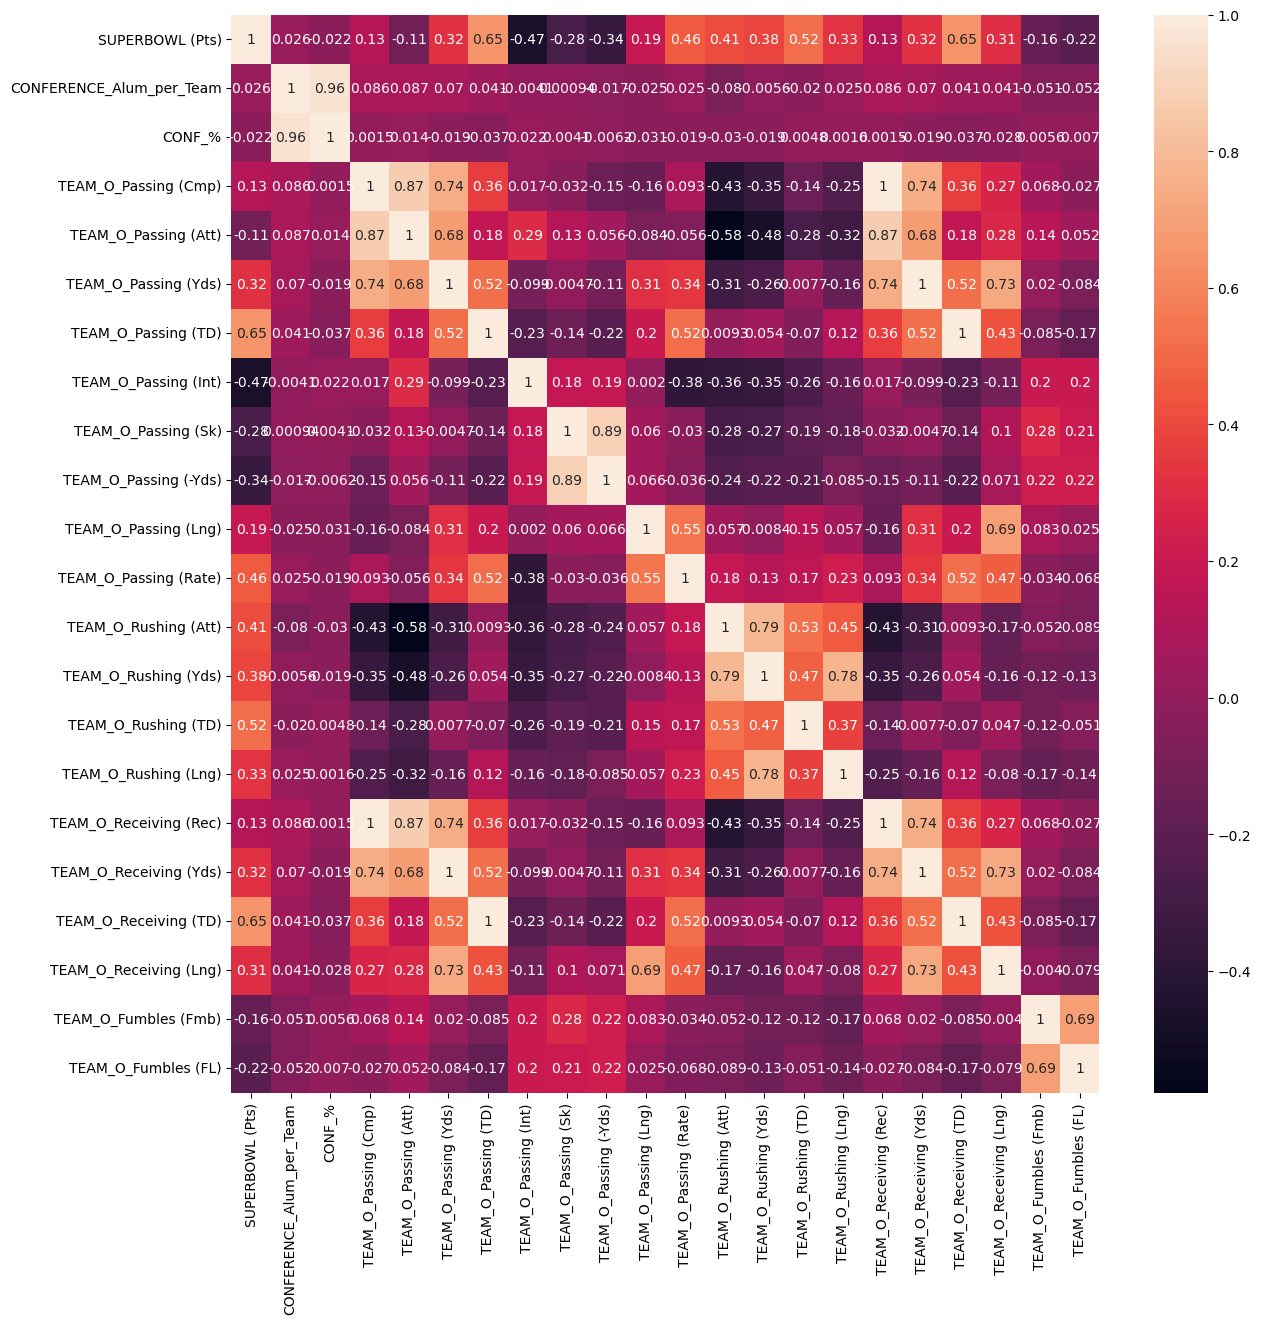

In [65]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(14,14))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_team_off = sns.heatmap(df_team_off.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

<a id='8'></a> <br>
>### B. Def heatmap

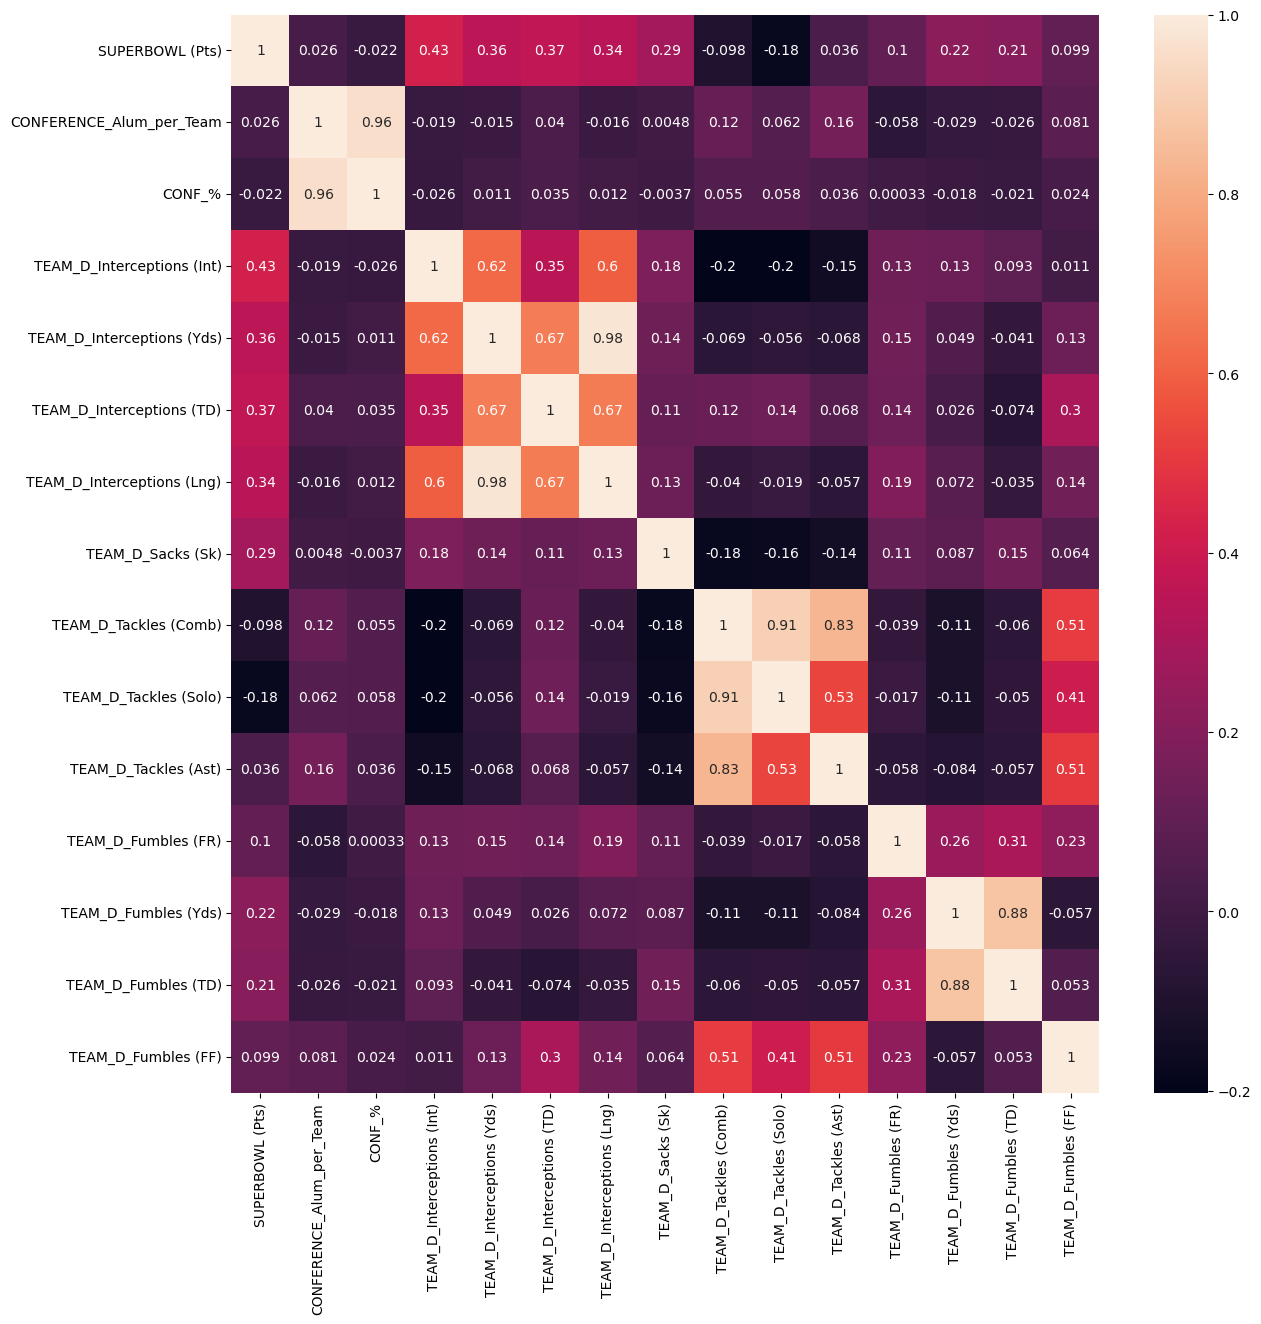

In [66]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(14,14))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_team_def = sns.heatmap(df_team_def.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

<a id='9'></a> <br>
>### C. SPT heatmap

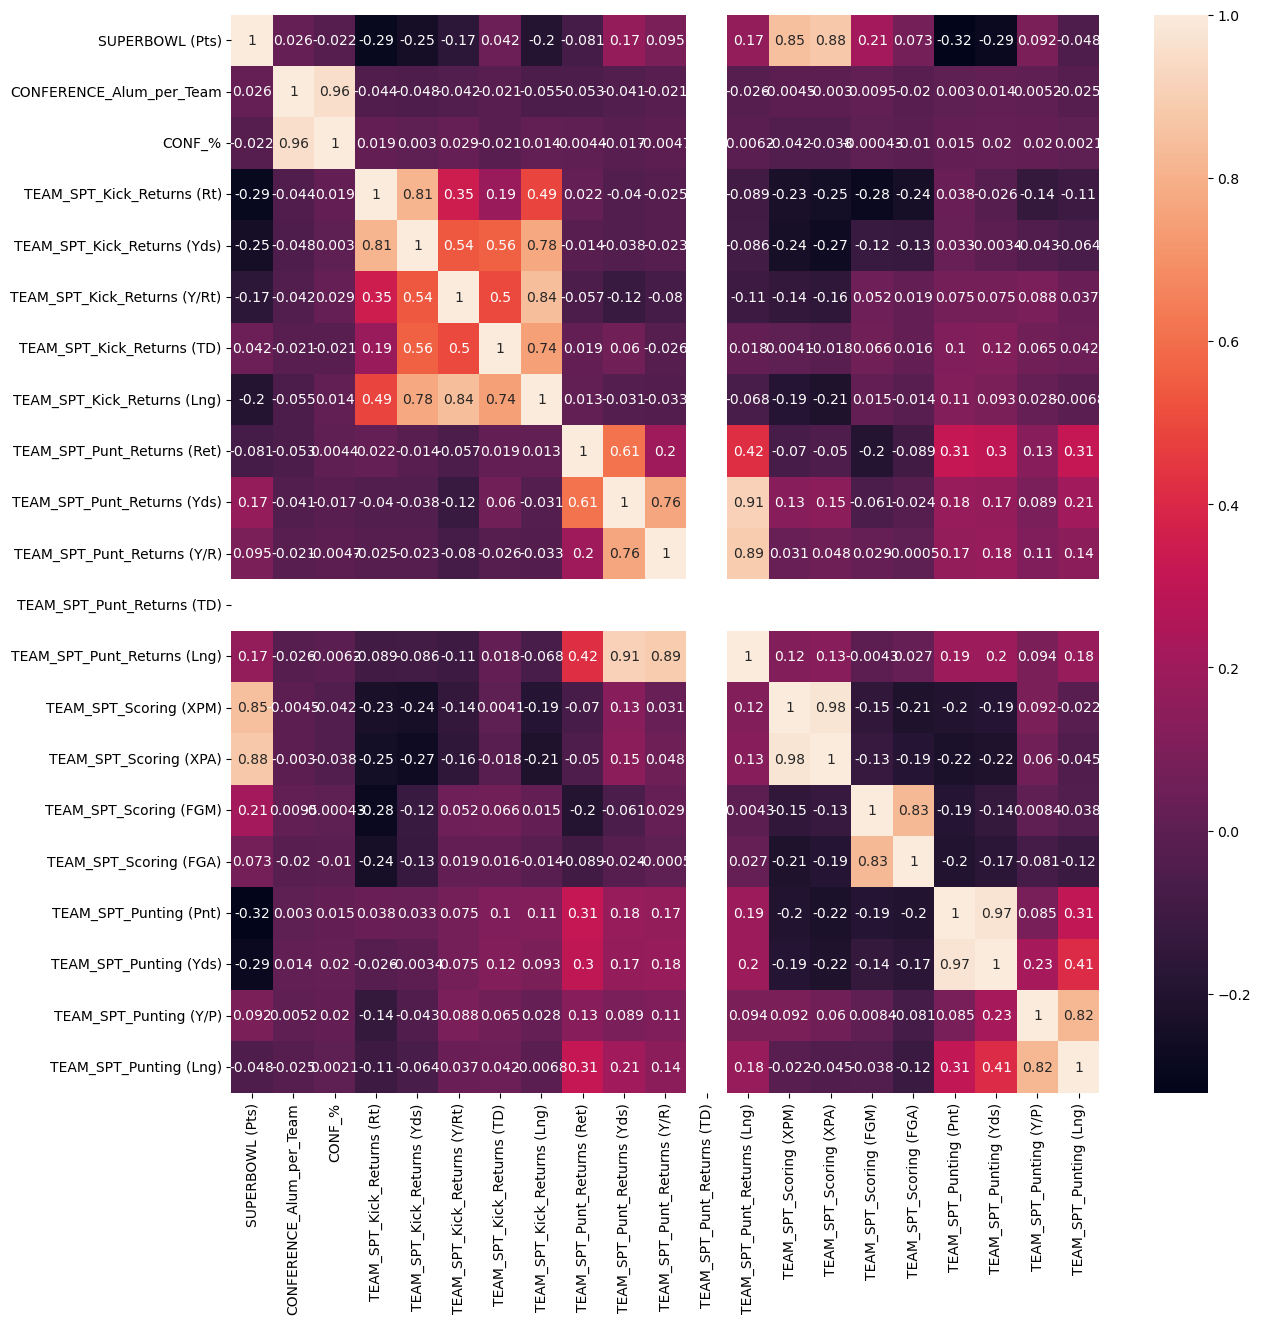

In [67]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(14,14))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_team_spt = sns.heatmap(df_team_spt.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

<a id='10'></a> <br>
## 7. Create simple YEAR column

In [68]:
# Create a new column called 'YEAR'

df_sbs_finalv2['YEAR'] = df_sbs_finalv2['SUPERBOWL (Date)'].str[-4:]

In [69]:
# check col

df_sbs_finalv2.head()

Team_Abbr  Superbowl_#    Key            Unique_Key    PLAYER (Name)  \
0       ARI           43  ARI43  ARI43Aaron Francisco  Aaron Francisco   
1       ARI           43  ARI43    ARI43Adrian Wilson    Adrian Wilson   
2       ARI           43  ARI43    ARI43Anquan Boldin    Anquan Boldin   
3       ARI           43  ARI43  ARI43Darnell Dockett  Darnell Dockett   
4       ARI           43  ARI43     ARI43Antrel Rolle     Antrel Rolle   

   PLAYER (No.)  PLAYER (Age) PLAYER (BirthDate)  PLAYER (Yrs_Active)  \
0            47            25           7/5/1983                    3   
1            24            29         10/12/1979                    7   
2            81            28          10/3/1980                    5   
3            90            27          5/27/1981                    4   
4            21            26         12/16/1982                    3   

                   PLAYER (Pos)     Unit SUPERBOWL (Rom_Num)  \
0           Defensive Back (DB)  Defense               XLIII   
1            Strong Safety (SS)  Defense               XLIII   
2            Wide Receiver (WR)  Offense               XLIII   
3  Right Defensive Tackle (RDT)  Defense               XLIII   
4              Free Safety (FS)  Defense               XLIII   

    SUPERBOWL (Team)  SUPERBOWL (Pts)  SUPERBOWL (MVP)    SUPERBOWL (Stadium)  \
0  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
1  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
2  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
3  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
4  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   

  SUPERBOWL (City) SUPERBOWL (State) SUPERBOWL (Date)  SUPERBOWL (W/L)  \
0            Tampa           Florida         2/1/2009                0   
1            Tampa           Florida         2/1/2009                0   
2            Tampa           Florida         2/1/2009                0   
3            Tampa           Florida         2/1/2009                0   
4            Tampa           Florida         2/1/2009                0   

   O_Passing (Cmp)  O_Passing (Att)  O_Passing (Yds)  O_Passing (TD)  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               0   
3                0                0                0               0   
4                0                0                0               0   

   O_Passing (Int)  O_Passing (Sk)  O_Passing (-Yds)  O_Passing (Lng)  \
0                0               0                 0                0   
1                0               0                 0                0   
2                0               0                 0                0   
3                0               0                 0                0   
4                0               0                 0                0   

   O_Passing (Rate)  O_Rushing (Att)  O_Rushing (Yds)  O_Rushing (TD)  \
0               0.0                0                0               0   
1               0.0                0                0               0   
2               0.0                0                0               0   
3               0.0                0                0               0   
4               0.0                0                0               0   

   O_Rushing (Lng)  O_Receiving (Rec)  O_Receiving (Yds)  O_Receiving (TD)  \
0                0                  0                  0                 0   
1                0                  0                  0                 0   
2                0                  8                 84                 0   
3                0                  0                  0                 0   
4                0                  0                  0                 0   

   O_Receiving (Lng) 

<a id='11'></a> <br>
## 8. Create more columns: td pts, total tds, total pts, total yds, total int, total sks, total fgs, highest avg. punt, highest avg. punt returns

In [71]:
# multiply number of O_Passing (TD), O_Rushing (TD), D_Interceptions (TD), D_Fumbles (TD), SPT_Kick_Returns (TD), SPT_Punt_Returns (TD) by 6

df_sbs_finalv2['pass_td_pts'] = df_sbs_finalv2['O_Passing (TD)'] * 6
df_sbs_finalv2['rush_td_pts'] = df_sbs_finalv2['O_Rushing (TD)'] * 6
df_sbs_finalv2['d_int_td_pts'] = df_sbs_finalv2['D_Interceptions (TD)'] * 6
df_sbs_finalv2['d_fumbles_td_pts'] = df_sbs_finalv2['D_Fumbles (TD)'] * 6
df_sbs_finalv2['kick_ret_td_pts'] = df_sbs_finalv2['SPT_Kick_Returns (TD)'] * 6
df_sbs_finalv2['punt_ret_td_pts'] = df_sbs_finalv2['SPT_Punt_Returns (TD)'] * 6

In [72]:
# check new cols

df_sbs_finalv2.head(60)

Team_Abbr  Superbowl_#    Key                        Unique_Key  \
0        ARI           43  ARI43              ARI43Aaron Francisco   
1        ARI           43  ARI43                ARI43Adrian Wilson   
2        ARI           43  ARI43                ARI43Anquan Boldin   
3        ARI           43  ARI43              ARI43Darnell Dockett   
4        ARI           43  ARI43                 ARI43Antrel Rolle   
5        ARI           43  ARI43              ARI43Calais Campbell   
6        ARI           43  ARI43               ARI43Edgerrin James   
7        ARI           43  ARI43                  ARI43Elton Brown   
8        ARI           43  ARI43                   ARI43Eric Green   
9        ARI           43  ARI43                 ARI43Gerald Hayes   
10       ARI           43  ARI43             ARI43Larry Fitzgerald   
11       ARI           43  ARI43                  ARI43Alan Branch   
12       ARI           43  ARI43                  ARI43Gabe Watson   
13       ARI           43  ARI43                 ARI43Jerame Tuman   
14       ARI           43  ARI43               ARI43Steve Breaston   
15       ARI           43  ARI43                ARI43Victor Hobson   
16       ARI           43  ARI43                ARI43Chike Okeafor   
17       ARI           43  ARI43                   ARI43Levi Brown   
18       ARI           43  ARI43                ARI43Kenny Iwebema   
19       ARI           43  ARI43                 ARI43Nathan Hodel   
20       ARI           43  ARI43                 ARI43Neil Rackers   
21       ARI           43  ARI43                  ARI43Ralph Brown   
22       ARI           43  ARI43                ARI43Ali Highsmith   
23       ARI           43  ARI43                 ARI43Early Doucet   
24       ARI           43  ARI43                ARI43Karlos Dansby   
25       ARI           43  ARI43                ARI43Roderick Hood   
26       ARI           43  ARI43                 ARI43Tim Castille   
27       ARI           43  ARI43                 ARI43Leonard Pope   
28       ARI           43  ARI43                ARI43Michael Adams   
29       ARI           43  ARI43                ARI43Antonio Smith   
30       ARI           43  ARI43                ARI43Lyle Sendlein   
31       ARI           43  ARI43                 ARI43Monty Beisel   
32       ARI           43  ARI43                   ARI43Ben Graham   
33       ARI           43  ARI43                  ARI43Ben Patrick   
34       ARI           43  ARI43               ARI43Bertrand Berry   
35       ARI           43  ARI43                   ARI43Mike Gandy   
36       ARI           43  ARI43               ARI43Bryan Robinson   
37       ARI           43  ARI43                ARI43Stephen Spach   
38       ARI           43  ARI43                  ARI43Deuce Lutui   
39       ARI           43  ARI43                 ARI43Matt Leinart   
40       ARI           43  ARI43               ARI43J.J. Arrington   
41       ARI           43  ARI43                    ARI43Matt Ware   
42       ARI           43  ARI43               ARI43Terrelle Smith   
43       ARI           43  ARI43                ARI43Clark Haggans   
44       ARI           43  ARI43                 ARI43Travis LaBoy   
45       ARI           43  ARI43                 ARI43Dirk Johnson   
46       ARI           43  ARI43                 ARI43Pago Togafau   
47       ARI           43  ARI43  ARI43Dominique Rodgers-Cromartie   
48       ARI           43  ARI43                ARI43Tim Hightower   
49       ARI           43  ARI43                 ARI43Reggie Wells   
50       ARI           43  ARI43                ARI43Jerheme Urban   
51       ARI           43  ARI43              ARI43Oliver Celestin   
52       ARI           43  ARI43                  ARI43Kurt Warner   
53       ARI           43  ARI43                   ARI43Sean Morey   
54       PIT           43  PIT43                 PIT43Brett Keisel   
55       PIT           43  PIT43                   PIT43Chris Hoke   
56       PIT 

In [73]:
# create total td col

df_sbs_finalv2['total_tds'] = df_sbs_finalv2['O_Passing (TD)'] + df_sbs_finalv2['O_Rushing (TD)'] + df_sbs_finalv2['D_Interceptions (TD)'] + df_sbs_finalv2['D_Fumbles (TD)'] + df_sbs_finalv2['SPT_Kick_Returns (TD)'] + df_sbs_finalv2['SPT_Punt_Returns (TD)']

In [74]:
# check col

df_sbs_finalv2.head(100)

Team_Abbr  Superbowl_#    Key                        Unique_Key  \
0        ARI           43  ARI43              ARI43Aaron Francisco   
1        ARI           43  ARI43                ARI43Adrian Wilson   
2        ARI           43  ARI43                ARI43Anquan Boldin   
3        ARI           43  ARI43              ARI43Darnell Dockett   
4        ARI           43  ARI43                 ARI43Antrel Rolle   
5        ARI           43  ARI43              ARI43Calais Campbell   
6        ARI           43  ARI43               ARI43Edgerrin James   
7        ARI           43  ARI43                  ARI43Elton Brown   
8        ARI           43  ARI43                   ARI43Eric Green   
9        ARI           43  ARI43                 ARI43Gerald Hayes   
10       ARI           43  ARI43             ARI43Larry Fitzgerald   
11       ARI           43  ARI43                  ARI43Alan Branch   
12       ARI           43  ARI43                  ARI43Gabe Watson   
13       ARI           43  ARI43                 ARI43Jerame Tuman   
14       ARI           43  ARI43               ARI43Steve Breaston   
15       ARI           43  ARI43                ARI43Victor Hobson   
16       ARI           43  ARI43                ARI43Chike Okeafor   
17       ARI           43  ARI43                   ARI43Levi Brown   
18       ARI           43  ARI43                ARI43Kenny Iwebema   
19       ARI           43  ARI43                 ARI43Nathan Hodel   
20       ARI           43  ARI43                 ARI43Neil Rackers   
21       ARI           43  ARI43                  ARI43Ralph Brown   
22       ARI           43  ARI43                ARI43Ali Highsmith   
23       ARI           43  ARI43                 ARI43Early Doucet   
24       ARI           43  ARI43                ARI43Karlos Dansby   
25       ARI           43  ARI43                ARI43Roderick Hood   
26       ARI           43  ARI43                 ARI43Tim Castille   
27       ARI           43  ARI43                 ARI43Leonard Pope   
28       ARI           43  ARI43                ARI43Michael Adams   
29       ARI           43  ARI43                ARI43Antonio Smith   
30       ARI           43  ARI43                ARI43Lyle Sendlein   
31       ARI           43  ARI43                 ARI43Monty Beisel   
32       ARI           43  ARI43                   ARI43Ben Graham   
33       ARI           43  ARI43                  ARI43Ben Patrick   
34       ARI           43  ARI43               ARI43Bertrand Berry   
35       ARI           43  ARI43                   ARI43Mike Gandy   
36       ARI           43  ARI43               ARI43Bryan Robinson   
37       ARI           43  ARI43                ARI43Stephen Spach   
38       ARI           43  ARI43                  ARI43Deuce Lutui   
39       ARI           43  ARI43                 ARI43Matt Leinart   
40       ARI           43  ARI43               ARI43J.J. Arrington   
41       ARI           43  ARI43                    ARI43Matt Ware   
42       ARI           43  ARI43               ARI43Terrelle Smith   
43       ARI           43  ARI43                ARI43Clark Haggans   
44       ARI           43  ARI43                 ARI43Travis LaBoy   
45       ARI           43  ARI43                 ARI43Dirk Johnson   
46       ARI           43  ARI43                 ARI43Pago Togafau   
47       ARI           43  ARI43  ARI43Dominique Rodgers-Cromartie   
48       ARI           43  ARI43                ARI43Tim Hightower   
49       ARI           43  ARI43                 ARI43Reggie Wells   
50       ARI           43  ARI43                ARI43Jerheme Urban   
51       ARI           43  ARI43              ARI43Oliver Celestin   
52       ARI           43  ARI43                  ARI43Kurt Warner   
53       ARI           43  ARI43                   ARI43Sean Morey   
54       PIT           43  PIT43                 PIT43Brett Keisel   
55       PIT           43  PIT43                   PIT43Chris Hoke   
56       PIT 

In [75]:
# create fg pts col

df_sbs_finalv2['fg_pts'] = df_sbs_finalv2['SPT_Scoring (FGM)'] * 6

In [76]:
# check col

df_sbs_finalv2.head()

Team_Abbr  Superbowl_#    Key            Unique_Key    PLAYER (Name)  \
0       ARI           43  ARI43  ARI43Aaron Francisco  Aaron Francisco   
1       ARI           43  ARI43    ARI43Adrian Wilson    Adrian Wilson   
2       ARI           43  ARI43    ARI43Anquan Boldin    Anquan Boldin   
3       ARI           43  ARI43  ARI43Darnell Dockett  Darnell Dockett   
4       ARI           43  ARI43     ARI43Antrel Rolle     Antrel Rolle   

   PLAYER (No.)  PLAYER (Age) PLAYER (BirthDate)  PLAYER (Yrs_Active)  \
0            47            25           7/5/1983                    3   
1            24            29         10/12/1979                    7   
2            81            28          10/3/1980                    5   
3            90            27          5/27/1981                    4   
4            21            26         12/16/1982                    3   

                   PLAYER (Pos)     Unit SUPERBOWL (Rom_Num)  \
0           Defensive Back (DB)  Defense               XLIII   
1            Strong Safety (SS)  Defense               XLIII   
2            Wide Receiver (WR)  Offense               XLIII   
3  Right Defensive Tackle (RDT)  Defense               XLIII   
4              Free Safety (FS)  Defense               XLIII   

    SUPERBOWL (Team)  SUPERBOWL (Pts)  SUPERBOWL (MVP)    SUPERBOWL (Stadium)  \
0  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
1  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
2  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
3  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
4  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   

  SUPERBOWL (City) SUPERBOWL (State) SUPERBOWL (Date)  SUPERBOWL (W/L)  \
0            Tampa           Florida         2/1/2009                0   
1            Tampa           Florida         2/1/2009                0   
2            Tampa           Florida         2/1/2009                0   
3            Tampa           Florida         2/1/2009                0   
4            Tampa           Florida         2/1/2009                0   

   O_Passing (Cmp)  O_Passing (Att)  O_Passing (Yds)  O_Passing (TD)  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               0   
3                0                0                0               0   
4                0                0                0               0   

   O_Passing (Int)  O_Passing (Sk)  O_Passing (-Yds)  O_Passing (Lng)  \
0                0               0                 0                0   
1                0               0                 0                0   
2                0               0                 0                0   
3                0               0                 0                0   
4                0               0                 0                0   

   O_Passing (Rate)  O_Rushing (Att)  O_Rushing (Yds)  O_Rushing (TD)  \
0               0.0                0                0               0   
1               0.0                0                0               0   
2               0.0                0                0               0   
3               0.0                0                0               0   
4               0.0                0                0               0   

   O_Rushing (Lng)  O_Receiving (Rec)  O_Receiving (Yds)  O_Receiving (TD)  \
0                0                  0                  0                 0   
1                0                  0                  0                 0   
2                0                  8                 84                 0   
3                0                  0                  0                 0   
4                0                  0                  0                 0   

   O_Receiving (Lng) 

In [77]:
# create total pts col

df_sbs_finalv2['total_pts'] = df_sbs_finalv2['pass_td_pts'] + df_sbs_finalv2['rush_td_pts'] + df_sbs_finalv2['d_int_td_pts'] + df_sbs_finalv2['d_fumbles_td_pts'] + df_sbs_finalv2['kick_ret_td_pts'] + df_sbs_finalv2['punt_ret_td_pts'] + df_sbs_finalv2['fg_pts']

In [78]:
# check col

df_sbs_finalv2.head()

Team_Abbr  Superbowl_#    Key            Unique_Key    PLAYER (Name)  \
0       ARI           43  ARI43  ARI43Aaron Francisco  Aaron Francisco   
1       ARI           43  ARI43    ARI43Adrian Wilson    Adrian Wilson   
2       ARI           43  ARI43    ARI43Anquan Boldin    Anquan Boldin   
3       ARI           43  ARI43  ARI43Darnell Dockett  Darnell Dockett   
4       ARI           43  ARI43     ARI43Antrel Rolle     Antrel Rolle   

   PLAYER (No.)  PLAYER (Age) PLAYER (BirthDate)  PLAYER (Yrs_Active)  \
0            47            25           7/5/1983                    3   
1            24            29         10/12/1979                    7   
2            81            28          10/3/1980                    5   
3            90            27          5/27/1981                    4   
4            21            26         12/16/1982                    3   

                   PLAYER (Pos)     Unit SUPERBOWL (Rom_Num)  \
0           Defensive Back (DB)  Defense               XLIII   
1            Strong Safety (SS)  Defense               XLIII   
2            Wide Receiver (WR)  Offense               XLIII   
3  Right Defensive Tackle (RDT)  Defense               XLIII   
4              Free Safety (FS)  Defense               XLIII   

    SUPERBOWL (Team)  SUPERBOWL (Pts)  SUPERBOWL (MVP)    SUPERBOWL (Stadium)  \
0  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
1  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
2  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
3  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   
4  Arizona Cardinals               23  Santonio Holmes  Raymond James Stadium   

  SUPERBOWL (City) SUPERBOWL (State) SUPERBOWL (Date)  SUPERBOWL (W/L)  \
0            Tampa           Florida         2/1/2009                0   
1            Tampa           Florida         2/1/2009                0   
2            Tampa           Florida         2/1/2009                0   
3            Tampa           Florida         2/1/2009                0   
4            Tampa           Florida         2/1/2009                0   

   O_Passing (Cmp)  O_Passing (Att)  O_Passing (Yds)  O_Passing (TD)  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               0   
3                0                0                0               0   
4                0                0                0               0   

   O_Passing (Int)  O_Passing (Sk)  O_Passing (-Yds)  O_Passing (Lng)  \
0                0               0                 0                0   
1                0               0                 0                0   
2                0               0                 0                0   
3                0               0                 0                0   
4                0               0                 0                0   

   O_Passing (Rate)  O_Rushing (Att)  O_Rushing (Yds)  O_Rushing (TD)  \
0               0.0                0                0               0   
1               0.0                0                0               0   
2               0.0                0                0               0   
3               0.0                0                0               0   
4               0.0                0                0               0   

   O_Rushing (Lng)  O_Receiving (Rec)  O_Receiving (Yds)  O_Receiving (TD)  \
0                0                  0                  0                 0   
1                0                  0                  0                 0   
2                0                  8                 84                 0   
3                0                  0                  0                 0   
4                0                  0                  0                 0   

   O_Receiving (Lng) 

In [79]:
# export as csv and pkl

df_sbs_finalv2.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_finalv2.csv'))

df_sbs_finalv2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_finalv2.pkl'))

In [4]:
# import latest df

df_sbs_finalv2 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_finalv2.csv'))

In [5]:
# check df

df_sbs_finalv2.shape

(6538, 213)

In [6]:
df_sbs_finalv2.head()

Team_Abbr  Superbowl_#    Key          Unique_Key  PLAYER (Name)  \
0       BUF           27  BUF27      BUF27Brad Lamb      Brad Lamb   
1       BUF           28  BUF28      BUF28Brad Lamb      Brad Lamb   
2       CIN           16  CIN16   CIN16Ken Anderson   Ken Anderson   
3       ATL           51  ATL51     ATL51Eric Weems     Eric Weems   
4       DEN           22  DEN22  DEN22Roger Jackson  Roger Jackson   

   PLAYER (No.)  PLAYER (Age) PLAYER (BirthDate)  PLAYER (Yrs_Active)  \
0            81            25          10/7/1967                    0   
1            81            26          10/7/1967                    1   
2            14            32          2/15/1949                   10   
3            14            31           7/4/1985                    9   
4            25            28          2/28/1959                    5   

          PLAYER (Pos)     Unit SUPERBOWL (Rom_Num)    SUPERBOWL (Team)  \
0   Wide Receiver (WR)  Offense               XXVII       Buffalo Bills   
1   Wide Receiver (WR)  Offense              XXVIII       Buffalo Bills   
2     Quarterback (QB)  Offense                 XVI  Cincinnati Bengals   
3   Wide Receiver (WR)  Offense                  LI     Atlanta Falcons   
4  Defensive Back (DB)  Defense                XXII      Denver Broncos   

   SUPERBOWL (Pts) SUPERBOWL (MVP)  SUPERBOWL (Stadium) SUPERBOWL (City)  \
0               17     Troy Aikman            Rose Bowl         Pasadena   
1               13    Emmitt Smith         Georgia Dome          Atlanta   
2               21     Joe Montana   Pontiac Silverdome          Pontiac   
3               28       Tom Brady          NRG Stadium          Houston   
4               10   Doug Williams  Jack Murphy Stadium        San Diego   

  SUPERBOWL (State) SUPERBOWL (Date)  SUPERBOWL (W/L)  O_Passing (Cmp)  \
0        California        1/31/1993                0                0   
1           Georgia        1/30/1994                0                0   
2          Michigan        1/24/1982                0               25   
3             Texas         2/5/2017                0                0   
4        California        1/31/1988                0                0   

   O_Passing (Att)  O_Passing (Yds)  O_Passing (TD)  O_Passing (Int)  \
0                0                0               0                0   
1                0                0               0                0   
2               34              300               2                2   
3                0                0               0                0   
4                0                0               0                0   

   O_Passing (Sk)  O_Passing (-Yds)  O_Passing (Lng)  O_Passing (Rate)  \
0               0                 0                0               0.0   
1               0                 0                0               0.0   
2               5                16               49              95.2   
3               0                 0                0               0.0   
4               0                 0                0               0.0   

   O_Rushing (Att)  O_Rushing (Yds)  O_Rushing (TD)  O_Rushing (Lng)  \
0                0                0               0                0   
1                0                0               0                0   
2                4               15               1                6   
3                0                0               0                0   
4                0                0               0                0   

   O_Receiving (Rec)  O_Receiving (Yds)  O_Receiving (TD)  O_Receiving (Lng)  \
0                  0                  0                 0                  0   
1                  0                  0                 0                  0   
2                  0                  0                 0                  0   
3                  0                  0                 0                  0   
4                  0                  0                 0                  0  

In [ ]:
df_sbs_finalv2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_finalv2.pkl'))

In [4]:
# import latest df_sbs

df_sbs_finalv2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_finalv2.pkl'))

<a id='12'></a> <br>
## 8. Create totals for separate Div, Conf, and Univ by year

In [10]:
# Division totals

df_div_totals = df_sbs_finalv2[['Superbowl_#', 'YEAR', 'UNIV (Division)', 'UNIV (Conference)', 'UNIV (Name)', 'Unit', 'PLAYER (Pos)',  'O_Passing (Cmp)', 'O_Passing (Att)', 'O_Passing (Yds)', 'O_Passing (TD)', 'O_Rushing (Yds)', 'O_Rushing (TD)', 'D_Interceptions (Int)', 'D_Sacks (Sk)', 'D_Fumbles (FF)', 'SPT_Kick_Returns (Y/Rt)', 'SPT_Punt_Returns (Y/R)', 'SPT_Scoring (XPM)', 'SPT_Scoring (FGM)', 'SPT_Punting (Y/P)']].copy()

In [11]:
# check df

df_div_totals.shape

(6538, 20)

In [12]:
df_div_totals.head()

YEAR UNIV (Division)                             UNIV (Conference)  \
0  1993         NCAA D3      Heartland Collegiate Athletic Conference   
1  1994         NCAA D3      Heartland Collegiate Athletic Conference   
2  1982         NCAA D3  College Conference of Illinois and Wisconsin   
3  2017         NCAA D1              Southwestern Athletic Conference   
4  1988         NCAA D1              Southwestern Athletic Conference   

                    UNIV (Name)     Unit         PLAYER (Pos)  total_pts  \
0  Anderson University, Indiana  Offense   Wide Receiver (WR)          0   
1  Anderson University, Indiana  Offense   Wide Receiver (WR)          0   
2   Augustana College, Illinois  Offense     Quarterback (QB)         18   
3   Bethune, Cookman University  Offense   Wide Receiver (WR)          0   
4   Bethune, Cookman University  Defense  Defensive Back (DB)          0   

   total_tds  O_Passing (Yds)  O_Passing (TD)  O_Rushing (Yds)  \
0          0                0               0                0   
1          0                0               0                0   
2          3              300               2               15   
3          0                0               0                0   
4          0                0               0                0   

   O_Rushing (TD)  D_Interceptions (Int)  D_Sacks (Sk)  D_Fumbles (FF)  \
0               0                      0           0.0               0   
1               0                      0           0.0               0   
2               1                      0           0.0               0   
3               0                      0           0.0               0   
4               0                      0           0.0               0   

   SPT_Kick_Returns (Y/Rt)  SPT_Punt_Returns (Y/R)  SPT_Scoring (XPM)  \
0                     24.5                     0.0                  0   
1                      0.0                     0.0                  0   
2                      0.0                     0.0                  0   
3                     12.5                     0.0                  0   
4                      0.0                     0.0                  0   

   SPT_Scoring (FGM)  SPT_Punting (Y/P)  
0                  0                0.0  
1                  0                0.0  
2                  0                0.0  
3                  0                0.0  
4                  0                0.0

In [13]:
# sort by year

df_div_totals = df_div_totals.sort_values('YEAR')

In [14]:
df_div_totals.head(65)

YEAR                                    UNIV (Division)  \
4316  1967                                            NCAA D1   
4309  1967                                            NCAA D1   
4310  1967                                            NCAA D1   
4311  1967                                            NCAA D1   
4312  1967                                            NCAA D2   
4313  1967                                            NCAA D1   
4314  1967                                            NCAA D1   
4315  1967                                            NCAA D1   
4282  1967                                            NCAA D1   
4281  1967                                            NCAA D1   
4317  1967                                            NCAA D1   
4308  1967                                            NCAA D1   
4318  1967                                            NCAA D1   
4320  1967                                            NCAA D1   
4321  1967  National Association of Intercollegiate Athletics   
130   1967                                            NCAA D1   
3833  1967                                            NCAA D1   
4280  1967                                            NCAA D1   
4279  1967                                            NCAA D1   
3834  1967                                            NCAA D1   
3835  1967                                            NCAA D1   
3836  1967  National Association of Intercollegiate Athlet...   
4287  1967                                            NCAA D1   
4319  1967                                            NCAA D1   
58    1967                                            NCAA D2   
4307  1967                                            NCAA D1   
4305  1967                                            NCAA D1   
4288  1967                                            NCAA D1   
4289  1967                                            NCAA D1   
4290  1967                                            NCAA D1   
4291  1967                                            NCAA D1   
4292  1967                                            NCAA D1   
4293  1967                                            NCAA D1   
4294  1967                                            NCAA D1   
4295  1967                                            NCAA D1   
114   1967                                            NCAA D1   
4285  1967                                            NCAA D1   
4306  1967                                            NCAA D1   
4284  1967                                            NCAA D1   
4297  1967                                            NCAA D1   
4283  1967                                            NCAA D1   
108   1967                                            NCAA D1   
4298  1967                                            NCAA D1   
4299  1967                                            NCAA D1   
4300  1967                                            NCAA D1   
4301  1967                                            NCAA D1   
4302  1967                                            NCAA D1   
4303  1967                                            NCAA D1   
4304  1967                                            NCAA D1   
4296  1967                                            NCAA D1   
6433  1967                                            NCAA D1   
4286  1967                                            NCAA D1   
3822  1967                                            NCAA D1   
3814  1967                                            NCAA D1   
3832  1967                                            NCAA D1   
3831  1967                                            NCAA D1   
3830  1967                                            NCAA D1   
3829  1967                                            NCAA D1   
3828  1967                                            NCAA D1   
3827  1967                                            NCAA D1   
3826  1967                               

In [15]:
df_div_totals.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_div_totals.csv'))

### Questions still unanswered:
    Who is/are the most prominent player(s) from the top 10 colleges?
    Which college has the best stats?
    Does having more players from the same college on a team give you a better chance of winning? 
    Does having players from higher ranked college teams help to win Super Bowls? 
    How many different colleges on each team?
    Of the winning SB teams, which stats were most prominent and which univ alum contributed to them?

In [6]:
# import latest df.pkl

df_sbs_finalv2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_sbs_finalv2.pkl'))

In [7]:
# check df

df_sbs_finalv2.head()

Team_Abbr  Superbowl_#    Key          Unique_Key  PLAYER (Name)  \
0       BUF           27  BUF27      BUF27Brad Lamb      Brad Lamb   
1       BUF           28  BUF28      BUF28Brad Lamb      Brad Lamb   
2       CIN           16  CIN16   CIN16Ken Anderson   Ken Anderson   
3       ATL           51  ATL51     ATL51Eric Weems     Eric Weems   
4       DEN           22  DEN22  DEN22Roger Jackson  Roger Jackson   

   PLAYER (No.)  PLAYER (Age) PLAYER (BirthDate)  PLAYER (Yrs_Active)  \
0            81            25          10/7/1967                    0   
1            81            26          10/7/1967                    1   
2            14            32          2/15/1949                   10   
3            14            31           7/4/1985                    9   
4            25            28          2/28/1959                    5   

          PLAYER (Pos)     Unit SUPERBOWL (Rom_Num)    SUPERBOWL (Team)  \
0   Wide Receiver (WR)  Offense               XXVII       Buffalo Bills   
1   Wide Receiver (WR)  Offense              XXVIII       Buffalo Bills   
2     Quarterback (QB)  Offense                 XVI  Cincinnati Bengals   
3   Wide Receiver (WR)  Offense                  LI     Atlanta Falcons   
4  Defensive Back (DB)  Defense                XXII      Denver Broncos   

   SUPERBOWL (Pts) SUPERBOWL (MVP)  SUPERBOWL (Stadium) SUPERBOWL (City)  \
0               17     Troy Aikman            Rose Bowl         Pasadena   
1               13    Emmitt Smith         Georgia Dome          Atlanta   
2               21     Joe Montana   Pontiac Silverdome          Pontiac   
3               28       Tom Brady          NRG Stadium          Houston   
4               10   Doug Williams  Jack Murphy Stadium        San Diego   

  SUPERBOWL (State) SUPERBOWL (Date)  SUPERBOWL (W/L)  O_Passing (Cmp)  \
0        California        1/31/1993                0                0   
1           Georgia        1/30/1994                0                0   
2          Michigan        1/24/1982                0               25   
3             Texas         2/5/2017                0                0   
4        California        1/31/1988                0                0   

   O_Passing (Att)  O_Passing (Yds)  O_Passing (TD)  O_Passing (Int)  \
0                0                0               0                0   
1                0                0               0                0   
2               34              300               2                2   
3                0                0               0                0   
4                0                0               0                0   

   O_Passing (Sk)  O_Passing (-Yds)  O_Passing (Lng)  O_Passing (Rate)  \
0               0                 0                0               0.0   
1               0                 0                0               0.0   
2               5                16               49              95.2   
3               0                 0                0               0.0   
4               0                 0                0               0.0   

   O_Rushing (Att)  O_Rushing (Yds)  O_Rushing (TD)  O_Rushing (Lng)  \
0                0                0               0                0   
1                0                0               0                0   
2                4               15               1                6   
3                0                0               0                0   
4                0                0               0                0   

   O_Receiving (Rec)  O_Receiving (Yds)  O_Receiving (TD)  O_Receiving (Lng)  \
0                  0                  0                 0                  0   
1                  0                  0                 0                  0   
2                  0                  0                 0                  0   
3                  0                  0                 0                  0   
4                  0                  0                 0                  0  

In [8]:
df_sbs_finalv2.shape

(6538, 213)

In [178]:
ct_univ_wvl = pd.crosstab([df_sbs_finalv2['Superbowl_#'], df_sbs_finalv2['UNIV (Name)']], df_sbs_finalv2['SUPERBOWL (W/L)']).copy()

In [179]:
ct_univ_wvl.head(60)

SUPERBOWL (W/L)                                       0  1
Superbowl_# UNIV (Name)                                   
1           Arizona State University                  1  0
            Auburn University                         4  0
            Baylor University                         1  0
            Bishop College                            1  0
            California State University, Los Angeles  0  1
            Florida A&M University                    1  0
            Georgia Tech                              0  1
            Grambling State University                1  1
            Indiana University                        0  1
            Louisiana State University (LSU)          1  1
            Michigan State University                 3  1
            Morris Brown College                      1  0
            Northwestern University                   1  0
            Ohio State University                     1  0
            Penn State                                1  1
            Philander Smith University                0  1
            Prairie View A & M University             1  0
            Purdue University                         1  0
            Sam Houston State University              1  0
            Southern Methodist University, SMU        1  1
            Southern University & A&M College         1  0
            Stanford University                       1  0
            Tarkio College                            1  0
            Tennessee State University                2  0
            Texas A&M University                      0  1
            Texas A&M University, Commerce            1  0
            Texas Christian University                1  1
            Texas Southern University                 1  0
            Texas Tech University                     1  1
            Tulane University                         0  1
            University of Alabama                     1  2
            University of Arkansas at Pine Bluff      0  1
            University of Cincinnati                  0  1
            University of Colorado, Boulder           0  1
            University of Florida                     0  1
            University of Georgia                     0  1
            University of Idaho                       1  1
            University of Illinois                    0  2
            University of Iowa                        1  1
            University of Kansas                      2  0
            University of Louisiana Monroe            1  0
            University of Maryland                    0  1
            University of Massachusetts, Amherst      0  1
            University of Memphis                     1  1
            University of Miami                       1  0
            University of Minnesota                   2  1
            University of Mississippi                 0  1
            University of Missouri                    1  0
            University of Notre Dame                  0  2
            University of Southern California         2  1
            University of Southern Mississippi        1  0
            University of Tennessee                   0  1
            University of Texas at Arlington          0  1
            University of Utah                        0  1
            University of Virginia                    0  1
            University of Wisconsin                   0  1
            Utah State University                     0  1
            Valparaiso University                     0  1
            Virginia Tech                             0  1
            West Chester University of Pennsylvania   1  0

In [180]:
ct_univ_wvl = ct_univ_wvl.reset_index()

In [181]:
ct_univ_wvl

SUPERBOWL (W/L)  Superbowl_#                               UNIV (Name)  0  1
0                          1                  Arizona State University  1  0
1                          1                         Auburn University  4  0
2                          1                         Baylor University  1  0
3                          1                            Bishop College  1  0
4                          1  California State University, Los Angeles  0  1
...                      ...                                       ... .. ..
4240                      58                     Vanderbilt University  1  0
4241                      58                           Ventura College  0  1
4242                      58                             Virginia Tech  0  1
4243                      58                  West Virginia University  1  0
4244                      58               Western Michigan University  1  2

[4245 rows x 4 columns]

In [182]:
ct_univ_wvl.columns

Index(['Superbowl_#', 'UNIV (Name)', 0, 1], dtype='object', name='SUPERBOWL (W/L)')

In [183]:
ct_univ_wvl_sorted = ct_univ_wvl.sort_values(['Superbowl_#', 1], ascending=[True, False])

In [184]:
ct_univ_wvl_sorted

SUPERBOWL (W/L)  Superbowl_#                               UNIV (Name)  0  1
30                         1                     University of Alabama  1  2
37                         1                    University of Illinois  0  2
48                         1                  University of Notre Dame  0  2
4                          1  California State University, Los Angeles  0  1
6                          1                              Georgia Tech  0  1
...                      ...                                       ... .. ..
4234                      58                      University of Toledo  1  0
4236                      58                        University of Utah  1  0
4239                      58                     University of Wyoming  1  0
4240                      58                     Vanderbilt University  1  0
4243                      58                  West Virginia University  1  0

[4245 rows x 4 columns]

In [120]:
ct_univ_wvl.reset_index(['Superbowl_#', 'UNIV (Name)'], inplace=True, drop=True)

In [97]:
ct_univ_wvl.set_index('Superbowl_#', inplace=True)

In [98]:
ct_univ_wvl.head()

SUPERBOWL (W/L)                               UNIV (Name)  0  1
Superbowl_#                                                    
1                                Arizona State University  1  0
1                                       Auburn University  4  0
1                                       Baylor University  1  0
1                                          Bishop College  1  0
1                California State University, Los Angeles  0  1

In [128]:
# create sub df that compares how many alumn from each college were on winning vs. losing team

df_sub_wvl = df_sbs_finalv2[['Superbowl_#', 'UNIV (Name)', 'SUPERBOWL (W/L)']].copy()

In [129]:
# check sub df

df_sub_wvl.shape

(6538, 3)

In [130]:
df_sub_wvl.head()

Superbowl_#                   UNIV (Name)  SUPERBOWL (W/L)
0           27  Anderson University, Indiana                0
1           28  Anderson University, Indiana                0
2           16   Augustana College, Illinois                0
3           51   Bethune, Cookman University                0
4           22   Bethune, Cookman University                0

In [154]:
# create pvt

pvt_univ_wvl = df_sub_wvl.pivot_table(index=['Superbowl_#', 'UNIV (Name)'], columns=['SUPERBOWL (W/L)'], aggfunc='count')

In [155]:
pvt_univ_wvl.head()

Empty DataFrame
Columns: []
Index: [(1, Arizona State University), (1, Auburn University), (1, Baylor University), (1, Bishop College), (1, California State University, Los Angeles)]

In [89]:
df_winners = df_sbs_finalv2.loc[df_sbs_finalv2['SUPERBOWL (W/L)'] == 1, ['Superbowl_#', 'SUPERBOWL (Team)', 'UNIV (Name)', 'UNIV_Alum_per_Team']].copy()

In [92]:
df_winners

Superbowl_#     SUPERBOWL (Team)                  UNIV (Name)  \
5              45    Green Bay Packers  Bethune, Cookman University   
7               7       Miami Dolphins  Bethune, Cookman University   
8               7       Miami Dolphins  Bethune, Cookman University   
9               8       Miami Dolphins  Bethune, Cookman University   
10              8       Miami Dolphins  Bethune, Cookman University   
...           ...                  ...                          ...   
6424            9  Pittsburgh Steelers     Wichita State University   
6433            1    Green Bay Packers     Wichita State University   
6484            2    Green Bay Packers     Wichita State University   
6488           22  Washington Redskins     Wichita State University   
6508           26  Washington Redskins     Wichita State University   

      UNIV_Alum_per_Team  
5                      1  
7                      2  
8                      2  
9                      2  
10                     2  
...                  ...  
6424                   1  
6433                   1  
6484                   1  
6488                   1  
6508                   1  

[3278 rows x 4 columns]

In [94]:
df_winners_sorted = df_winners.sort_values(['Superbowl_#', 'UNIV_Alum_per_Team'], ascending=[True, False])

In [95]:
df_winners_sorted

Superbowl_#    SUPERBOWL (Team)  \
3808            1   Green Bay Packers   
3809            1   Green Bay Packers   
3817            1   Green Bay Packers   
3818            1   Green Bay Packers   
3826            1   Green Bay Packers   
...           ...                 ...   
4232           58  Kansas City Chiefs   
4233           58  Kansas City Chiefs   
4234           58  Kansas City Chiefs   
4235           58  Kansas City Chiefs   
4236           58  Kansas City Chiefs   

                                      UNIV (Name)  UNIV_Alum_per_Team  
3808                       University of Illinois                   2  
3809                       University of Illinois                   2  
3817                        University of Alabama                   2  
3818                        University of Alabama                   2  
3826                     University of Notre Dame                   2  
...                                           ...                 ...  
4232                  Georgia Southern University                   1  
4233                University of Hawaii at Manoa                   1  
4234               United States Military Academy                   1  
4235  Missouri University of Science & Technology                   1  
4236                   University of South Dakota                   1  

[3278 rows x 4 columns]

In [96]:
df_winners_sort_no_dups = df_winners_sorted.drop_duplicates()

In [99]:
df_winners_sort_no_dups.tail(60)

Superbowl_#    SUPERBOWL (Team)  \
4168           57  Kansas City Chiefs   
4169           57  Kansas City Chiefs   
4170           57  Kansas City Chiefs   
4171           57  Kansas City Chiefs   
4172           57  Kansas City Chiefs   
4173           57  Kansas City Chiefs   
4174           57  Kansas City Chiefs   
4175           57  Kansas City Chiefs   
4176           57  Kansas City Chiefs   
4177           57  Kansas City Chiefs   
4199           58  Kansas City Chiefs   
4218           58  Kansas City Chiefs   
538            58  Kansas City Chiefs   
4194           58  Kansas City Chiefs   
4197           58  Kansas City Chiefs   
4205           58  Kansas City Chiefs   
4207           58  Kansas City Chiefs   
4209           58  Kansas City Chiefs   
4212           58  Kansas City Chiefs   
4216           58  Kansas City Chiefs   
4224           58  Kansas City Chiefs   
77             58  Kansas City Chiefs   
111            58  Kansas City Chiefs   
300            58  Kansas City Chiefs   
479            58  Kansas City Chiefs   
4178           58  Kansas City Chiefs   
4179           58  Kansas City Chiefs   
4180           58  Kansas City Chiefs   
4181           58  Kansas City Chiefs   
4182           58  Kansas City Chiefs   
4183           58  Kansas City Chiefs   
4184           58  Kansas City Chiefs   
4185           58  Kansas City Chiefs   
4186           58  Kansas City Chiefs   
4187           58  Kansas City Chiefs   
4188           58  Kansas City Chiefs   
4189           58  Kansas City Chiefs   
4190           58  Kansas City Chiefs   
4191           58  Kansas City Chiefs   
4192           58  Kansas City Chiefs   
4193           58  Kansas City Chiefs   
4196           58  Kansas City Chiefs   
4203           58  Kansas City Chiefs   
4204           58  Kansas City Chiefs   
4211           58  Kansas City Chiefs   
4214           58  Kansas City Chiefs   
4215           58  Kansas City Chiefs   
4222           58  Kansas City Chiefs   
4223           58  Kansas City Chiefs   
4226           58  Kansas City Chiefs   
4227           58  Kansas City Chiefs   
4228           58  Kansas City Chiefs   
4229           58  Kansas City Chiefs   
4230           58  Kansas City Chiefs   
4231           58  Kansas City Chiefs   
4232           58  Kansas City Chiefs   
4233           58  Kansas City Chiefs   
4234           58  Kansas City Chiefs   
4235           58  Kansas City Chiefs   
4236           58  Kansas City Chiefs   

                                       UNIV (Name)  UNIV_Alum_per_Team  
4168                          University of Oregon                   1  
4169                               Ventura College                   1  
4170                     Valdosta State University                   1  
4171                   Georgia Southern University                   1  
4172                   Western Illinois University                   1  
4173                 University of Hawaii at Manoa                   1  
4174                United States Military Academy                   1  
4175            Missouri Southern State University                   1  
4176   Missouri University of Science & Technology                   1  
4177                    University of South Dakota                   1  
4199                         University of Florida                   4  
4218                        University of Oklahoma                   4  
538                    University of Texas, Austin                   2  
4194                   Western Michigan University                   2  
4197              Louisiana State University (LSU)                   2  
4205                         University of Georgia                   2  
4207                  Mississippi State University                   2  
4209                        University of Missouri                   2  
4212             Middle Tennessee State University                   2  
4216                      University of Cinc

In [39]:
df_winners['Team'] = df_winners['SUPERBOWL (Team)'] + '_' + df_winners['Superbowl_#'].astype(str)

In [40]:
df_winners.head()

SUPERBOWL (Team)  Superbowl_#                  UNIV (Name)  \
5   Green Bay Packers           45  Bethune, Cookman University   
7      Miami Dolphins            7  Bethune, Cookman University   
8      Miami Dolphins            7  Bethune, Cookman University   
9      Miami Dolphins            8  Bethune, Cookman University   
10     Miami Dolphins            8  Bethune, Cookman University   

                    Team  
5   Green Bay Packers_45  
7       Miami Dolphins_7  
8       Miami Dolphins_7  
9       Miami Dolphins_8  
10      Miami Dolphins_8

In [43]:
df_winners_drop = df_winners.drop(columns= {'SUPERBOWL (Team)', 'Superbowl_#'}).copy()

In [44]:
df_winners_drop.head()

UNIV (Name)                  Team
5   Bethune, Cookman University  Green Bay Packers_45
7   Bethune, Cookman University      Miami Dolphins_7
8   Bethune, Cookman University      Miami Dolphins_7
9   Bethune, Cookman University      Miami Dolphins_8
10  Bethune, Cookman University      Miami Dolphins_8

In [45]:
df_winners_drop.shape

(3278, 2)

In [87]:
pvt_winners = df_winners_drop.pivot_table(index='UNIV (Name)', columns='Team', values='UNIV (Name)', aggfunc='count')

In [88]:
pvt_winners

Empty DataFrame
Columns: []
Index: [Abilene Christian University, Alabama A&M University, Alabama State University, Albany State University, Alcorn State University, Allen University, Amherst College, Angelo State University, Appalachian State University, Arizona State University, Arkansas State University, Arkansas Tech University, Assumption University, Auburn University, Azusa Pacific University, Ball State University, Baylor University, Bethune, Cookman University, Bishop College, Bloomsburg University of Pennsylvania, Boise State University, Boston College, Boston University, Bowling Green State University, Brigham Young University, Brown University, Bucknell University, California Polytechnic State University, San Luis Obispo, California State University, Bakersfield, California State University, East Bay, California State University, Fresno, California State University, Long Beach, California State University, Los Angeles, California State University, Sacramento, California State, Fullerton, Cameron University, Carson-Newman University, Carthage College, Central College, Central Michigan University, Central State University, Chadron State College, Clark Atlanta University, Clemson University, Coastal Carolina University, Colgate University, College of the Holy Cross, Colorado State University, Colorado State University, Pueblo, Columbia University, Concordia University, St. Paul, St. Paul, Cornell University, Delaware State University, Duke University, East Carolina University, East Central University, Eastern Illinois University, Eastern Kentucky University, Eastern Michigan University, Eastern Washington University, Elizabeth City State University, Elon University, Emporia State University, Fayetteville State University, Florida A&M University, Florida Atlantic University, Florida State University, Fort Valley State University, Gardner, Webb University, Georgia Southern University, Georgia Tech, Grambling State University, Hampton University, Harding University, Harvard University, Hobart & William Smith College, Hofstra University, Howard Payne University, Howard University, Humboldt State University, Idaho State University, Illinois State University, Indiana University, Indiana University of Pennsylvania, Iowa State University, Jackson State University, Jacksonville State University, James Madison University, John Carroll University, Kansas State University, Kent State University, Kutztown University of Pennsylvania, Lamar University, Lane College, Langston University, Lehigh University, Liberty University, Lindenwood University, Livingstone College, Louisiana State University (LSU), ...]

[312 rows x 0 columns]

In [61]:
grp_winners = df_winners_drop.groupby(['Team','UNIV (Name)'])['UNIV (Name)'].count().copy()

In [67]:
grp_winners.head(60)

Team                 UNIV (Name)                         
Baltimore Colts_5    Boston College                          1
                     Bucknell University                     2
                     Duke University                         1
                     Georgia Tech                            1
                     Grambling State University              1
                     Illinois State University               1
                     Indiana University                      1
                     Jackson State University                1
                     Louisiana State University (LSU)        1
                     Louisiana Tech University               1
                     Michigan State University               2
                     Mississippi State University            1
                     Ohio State University                   2
                     Penn State                              1
                     Sam Houston State University           

In [66]:
grp_winners.sort_values()

Team                     UNIV (Name)                      
Baltimore Colts_5        Boston College                       1
New York Jets_3          Texas Tech University                1
                         Texas Southern University            1
                         Texas A&M University, Commerce       1
                         Temple University                    1
                                                             ..
Oakland Raiders_15       University of Colorado, Boulder      5
Green Bay Packers_31     University of Notre Dame             5
Dallas Cowboys_28        University of Miami                  6
New England Patriots_39  Louisiana State University (LSU)     6
Oakland Raiders_11       University of Southern California    7
Name: UNIV (Name), Length: 2522, dtype: int64

In [28]:
df_winners.head(25)

Key                                   UNIV (Name)
1215  BAL35                        University of Oklahoma
1201  BAL35                   Eastern Michigan University
1200  BAL35                            Rutgers University
1199  BAL35                        University of Maryland
1198  BAL35                        University of Maryland
1197  BAL35                                    Penn State
1196  BAL35                                    Penn State
240   BAL35  University of California, Los Angeles (UCLA)
1194  BAL35                     Michigan State University
1193  BAL35                           Livingstone College
1192  BAL35                      University of Louisville
1191  BAL35                      University of Louisville
1190  BAL35                            Clemson University
1189  BAL35                      University of Pittsburgh
1188  BAL35                      University of Pittsburgh
1187  BAL35                                 Virginia Tech
1186  BAL35                        University of Virginia
1185  BAL35                        University of Virginia
1184  BAL35                           University of Miami
1183  BAL35                           University of Miami
1182  BAL35                           University of Miami
1181  BAL35                           University of Miami
1180  BAL35                      Florida State University
1179  BAL35                        Wake Forest University
1178  BAL35                          University of Oregon

In [29]:
df_winners = df_winners.drop_duplicates()

In [30]:
df_winners.shape

(2526, 2)

In [32]:
df_winners.head(60)

Key                                   UNIV (Name)
1215  BAL35                        University of Oklahoma
1201  BAL35                   Eastern Michigan University
1200  BAL35                            Rutgers University
1199  BAL35                        University of Maryland
1197  BAL35                                    Penn State
240   BAL35  University of California, Los Angeles (UCLA)
1194  BAL35                     Michigan State University
1193  BAL35                           Livingstone College
1192  BAL35                      University of Louisville
1190  BAL35                            Clemson University
1189  BAL35                      University of Pittsburgh
1187  BAL35                                 Virginia Tech
1186  BAL35                        University of Virginia
1184  BAL35                           University of Miami
1180  BAL35                      Florida State University
1179  BAL35                        Wake Forest University
1178  BAL35                          University of Oregon
1177  BAL35                         University of Arizona
1175  BAL35                            University of Utah
1202  BAL35                          University of Toledo
1203  BAL35                       University of Louisiana
1195  BAL35                             Purdue University
1205  BAL35            University of Southern Mississippi
448   BAL35               University of Nevada, Las Vegas
1226  BAL35                           University of Maine
1225  BAL35                           Syracuse University
1204  BAL35                University of Louisiana Monroe
1222  BAL35                     Savannah State University
1221  BAL35                      Clark Atlanta University
1220  BAL35                           Tuskegee University
1219  BAL35            Indiana University of Pennsylvania
26    BAL35           California State University, Fresno
499   BAL35                   University of Texas, Austin
1218  BAL35                           University of Idaho
1223  BAL35                      University of Cincinnati
1216  BAL35                    San Diego State University
1217  BAL35               University of Northern Colorado
1206  BAL35                     Arkansas State University
1207  BAL35                     Louisiana Tech University
1208  BAL35                               Rice University
1209  BAL35                         University of Florida
1211  BAL35                       University of Tennessee
1212  BAL35                         Vanderbilt University
1213  BAL35                          Texas A&M University
1214  BAL35                             Auburn University
1160  BAL47                        University of Maryland
1166  BAL47                           Washburn University
1158  BAL47                        University of Nebraska
1157  BAL47                            University of Iowa
1162  BAL47                    Tennessee State University
1163  BAL47                                  Lane College
1164  BAL47                             Morehouse College
1165  BAL47                 Prairie View A & M University
1161  BAL47                            Rutgers University
1167  BAL47                            Harvard University
1173  BAL47                           Marshall University
1169  BAL47                           Syracuse University
1170  BAL47               South Carolina State University
1171  BAL47                     Arkansas State University
1174  BAL47                   University of New Hampshire